In [1]:
import pandas as pd
from scipy import stats
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
import helpers as he
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import mPower_preprocess as mp
from importlib import reload
import matplotlib.pyplot as plt

from keras.models import Model
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input

from keras.layers import CuDNNLSTM

from keras.optimizers import Adam
from keras.optimizers import RMSprop

from keras.utils import to_categorical
from keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
reload(mp)
reload(he)

<module 'helpers' from 'D:\\Diploma_code\\FinalB\\helpers.py'>

In [3]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['axes.formatter.useoffset'] = False

In [3]:
reshaped_TrainSegments, trainLabels, train_hcs = he.read_mPowerAll(128,128, True, 118)

Reshaping started ...
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8

temphc
01b21550-2c5d-4b37-8a95-8d949beaf22e 01b21550-2c5d-4b37-8a95-8d949beaf22e 2
01b21550-2c5d-4b37-8a95-8d949beaf22e 01b21550-2c5d-4b37-8a95-8d949beaf22e 2
01b21550-2c5d-4b37-8a95-8d949beaf22e 01b21550-2c5d-4b37-8a95-8d949beaf22e 2
01b21550-2c5d-4b37-8a95-8d949beaf22e 01b21550-2c5d-4b37-8a95-8d949beaf22e 2
01b21550-2c5d-4b37-8a95-8d949beaf22e 01b21550-2c5d-4b37-8a95-8d949beaf22e 2
01b21550-2c5d-4b37-8a95-8d949beaf22e 01b21550-2c5d-4b37-8a95-8d949beaf22e 2
01b21550-2c5d-4b37-8a95-8d949beaf22e 01b21550-2c5d-4b37-8a95-8d949beaf22e 2
01b21550-2c5d-4b37-8a95-8d949beaf22e 01b21550-2c5d-4b37-8a95-8d949beaf22e 2
01b21550-2c5d-4b37-8a95-8d949beaf22e 01b21550-2c5d-4b37-8a95-8d949beaf22e 2
temphc
02349c35-2559-4944-9987-78b9bb71d9e7 02349c35-2559-4944-9987-78b9bb71d9e7 3
02349c35-2559-4944-9987-78b9bb71d9e7 02349c35-2559-4944-9987-78b9bb71d9e7 3
02349c35-2559-4944-9987-78b9bb71d9e7 02349c35-2559-4944-9987-78b9bb71d9e7 3
02349c35-2559-4944-9987-78b9bb71d9e7 02349c35-2559-4944-9987-78b9bb71d9e7 

03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
temphc
04869afa-ffc0-48af-b84e-af166329b92f 04869afa-ffc0-48af-b84e-af166329b92f 10
04869afa-ffc0-48af-b84e-af166329b92f 04869afa-ffc0-48af-b84e-af166329b92f 10
04869afa-ffc0-48af-b84e-af166329b92f 04869afa-ffc0-48af-b84e-af166329b92f 10
04869afa-ffc0-48af-b84e-af166329b92f 04869afa-ffc0-48af-b84e-af166329b92f 10
04869afa-ffc0-48af-b84e-af166329b92f 04869afa-ffc0-48af-b84e-af166329b92f 10


temphc
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e0

07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
temphc
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-67915385

080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-679153859229 17

090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21

temphc
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77

0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22
0a623a36-ea3e-4557-9579-ae960c77f4d7 0a623a36-ea3e-4557-9579-ae960c77f4d7 22

0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24

0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24

0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24

0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25

0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25

0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25

temphc
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b90be 32
0da99328-71be-4d6a-862e-ac58f58b90be 0da99328-71be-4d6a-862e-ac58f58b

0fa09de8-9c0d-4859-894f-d85f6e5e583e 0fa09de8-9c0d-4859-894f-d85f6e5e583e 37
0fa09de8-9c0d-4859-894f-d85f6e5e583e 0fa09de8-9c0d-4859-894f-d85f6e5e583e 37
0fa09de8-9c0d-4859-894f-d85f6e5e583e 0fa09de8-9c0d-4859-894f-d85f6e5e583e 37
0fa09de8-9c0d-4859-894f-d85f6e5e583e 0fa09de8-9c0d-4859-894f-d85f6e5e583e 37
temphc
10254517-055e-4a85-b07d-aadcaee16eda 10254517-055e-4a85-b07d-aadcaee16eda 38
10254517-055e-4a85-b07d-aadcaee16eda 10254517-055e-4a85-b07d-aadcaee16eda 38
10254517-055e-4a85-b07d-aadcaee16eda 10254517-055e-4a85-b07d-aadcaee16eda 38
10254517-055e-4a85-b07d-aadcaee16eda 10254517-055e-4a85-b07d-aadcaee16eda 38
10254517-055e-4a85-b07d-aadcaee16eda 10254517-055e-4a85-b07d-aadcaee16eda 38
10254517-055e-4a85-b07d-aadcaee16eda 10254517-055e-4a85-b07d-aadcaee16eda 38
10254517-055e-4a85-b07d-aadcaee16eda 10254517-055e-4a85-b07d-aadcaee16eda 38
10254517-055e-4a85-b07d-aadcaee16eda 10254517-055e-4a85-b07d-aadcaee16eda 38
10254517-055e-4a85-b07d-aadcaee16eda 10254517-055e-4a85-b07d-aadcaee1

1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
temphc
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c89f31 41
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c89f31 41
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c8

116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42

116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42

13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47
13244475-e4c5-444b-b7df-3e148c71a3c9 13244475-e4c5-444b-b7df-3e148c71a3c9 47

13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48

153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51
153b35bc-568c-4da0-a5f9-751d9fa2b93d 153b35bc-568c-4da0-a5f9-751d9fa2b93d 51

168948fc-d25f-4a09-8024-d5578021eac4 168948fc-d25f-4a09-8024-d5578021eac4 54
168948fc-d25f-4a09-8024-d5578021eac4 168948fc-d25f-4a09-8024-d5578021eac4 54
168948fc-d25f-4a09-8024-d5578021eac4 168948fc-d25f-4a09-8024-d5578021eac4 54
168948fc-d25f-4a09-8024-d5578021eac4 168948fc-d25f-4a09-8024-d5578021eac4 54
168948fc-d25f-4a09-8024-d5578021eac4 168948fc-d25f-4a09-8024-d5578021eac4 54
temphc
16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 55
16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 55
16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 55
16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 55
16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 55
16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 55
16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 55
16e333cd-6a0e-4f5c-9cb4-98f9ed60a4cf 16e333cd-6a0e-4f5c-9cb4-98f9ed60

17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56

temphc
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264b98f 62
1a9cbb0f-4ade-4da7-a798-35d04264b98f 1a9cbb0f-4ade-4da7-a798-35d04264

1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64
1bbf0602-3e76-413e-9261-0a0804c2060d 1bbf0602-3e76-413e-9261-0a0804c2060d 64

1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65
1bc4e225-7dd2-439a-8546-e66ebd98a4f0 1bc4e225-7dd2-439a-8546-e66ebd98a4f0 65

1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71
1e39975b-18d1-4414-8275-2d4a5f7e035c 1e39975b-18d1-4414-8275-2d4a5f7e035c 71

20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75
20b09fcb-eb66-4282-b53a-51aa24f1f9d2 20b09fcb-eb66-4282-b53a-51aa24f1f9d2 75

214d0161-a5cb-4ddd-a285-c29a6a07fe3e 214d0161-a5cb-4ddd-a285-c29a6a07fe3e 80
214d0161-a5cb-4ddd-a285-c29a6a07fe3e 214d0161-a5cb-4ddd-a285-c29a6a07fe3e 80
214d0161-a5cb-4ddd-a285-c29a6a07fe3e 214d0161-a5cb-4ddd-a285-c29a6a07fe3e 80
temphc
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06a6c2 81
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06a6c2 81
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06a6c2 81
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06a6c2 81
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06a6c2 81
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06a6c2 81
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06a6c2 81
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06a6c2 81
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06a6c2 81
2171dbeb-adc5-40f3-8f75-526bad06a6c2 2171dbeb-adc5-40f3-8f75-526bad06

231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86
231c45ce-c155-4a4d-a546-10a482a4eb59 231c45ce-c155-4a4d-a546-10a482a4eb59 86

25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91

25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94
25f75a03-516d-4f1d-aa1e-c35d0183301f 25f75a03-516d-4f1d-aa1e-c35d0183301f 94

26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95

temphc
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
27fe6352-b3cc-415e-9e11-40d984cf5447 27fe6352-b3cc-415e-9e11-40d984cf5447 99
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

In [21]:
trainLabels["27"].value_counts()

1.0    47793
0.0    30847
3.0    28721
2.0    27862
Name: 27, dtype: int64

In [22]:
trainLabels["210"].value_counts()

1.0    57201
0.0    50632
2.0    19370
3.0     8020
Name: 210, dtype: int64

In [23]:
trainLabels["212"].value_counts()

1.0    58327
0.0    44524
2.0    25214
3.0     7158
Name: 212, dtype: int64

In [24]:
trainLabels["213"].value_counts()

0.0    101594
1.0     25607
3.0      4772
2.0      3250
Name: 213, dtype: int64

In [25]:
len(list(set (train_hcs)))

545

In [26]:
mPowerX_train, mPowerX_test, mPowery_train, mPowery_test, trainHc, testHc = train_test_split(reshaped_TrainSegments, trainLabels, train_hcs, test_size=0.20, random_state=33)

In [28]:
print(len(list(set (trainHc))))
print(len(list(set (testHc))))

545
515


In [31]:
mPowery_test["27"].value_counts()

1.0    9564
0.0    6111
3.0    5733
2.0    5637
Name: 27, dtype: int64

In [32]:
mPowery_test["210"].value_counts()

1.0    11415
0.0    10197
2.0     3820
3.0     1613
Name: 210, dtype: int64

In [33]:
mPowery_test["212"].value_counts()

1.0    11709
0.0     8884
2.0     5060
3.0     1392
Name: 212, dtype: int64

In [34]:
mPowery_test["213"].value_counts()

0.0    20295
1.0     5128
3.0      938
2.0      684
Name: 213, dtype: int64

In [35]:
mPowery_train["27"].value_counts()

1.0    38229
0.0    24736
3.0    22988
2.0    22225
Name: 27, dtype: int64

In [36]:
mPowery_train["210"].value_counts()

1.0    45786
0.0    40435
2.0    15550
3.0     6407
Name: 210, dtype: int64

In [37]:
mPowery_train["212"].value_counts()

1.0    46618
0.0    35640
2.0    20154
3.0     5766
Name: 212, dtype: int64

In [38]:
mPowery_train["213"].value_counts()

0.0    81299
1.0    20479
3.0     3834
2.0     2566
Name: 213, dtype: int64

In [42]:
verbose, epochs, batch_size = 1, 100, 128
n_timesteps, n_features, n_outputs = reshaped_TrainSegments.shape[1], reshaped_TrainSegments.shape[2], 4
print("Num_timesteps: " + str(n_timesteps))
print("Num_features: " + str(n_features))
print("Outputs: " + str(n_outputs))

Num_timesteps: 128
Num_features: 6
Outputs: 4


## LSTM128  (num epochs = 100 + 100 )

In [76]:
inputL = Input(shape=(n_timesteps, n_features))
firstLstm = CuDNNLSTM(128)(inputL)
#firstDrop = Dropout(0.5)(firstLstm)

#fc1 = Dense(128, activation='relu')(firstDrop)
#fc2 = Dense(128, activation='relu')(fc1)

output27 = Dense(n_outputs, activation='softmax', name='2_7out')(firstLstm)
output210 = Dense(n_outputs, activation='softmax', name='2_10out')(firstLstm)
output212 = Dense(n_outputs, activation='softmax', name='2_12out')(firstLstm)
output213 = Dense(n_outputs, activation='softmax', name='2_13out')(firstLstm)

Lstm = Model(inputs=inputL, outputs=[output27, output210, output212, output213])
print(Lstm.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 128, 6)       0                                            
__________________________________________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)        (None, 128)          69632       input_6[0][0]                    
__________________________________________________________________________________________________
2_7out (Dense)                  (None, 4)            516         cu_dnnlstm_6[0][0]               
__________________________________________________________________________________________________
2_10out (Dense)                 (None, 4)            516         cu_dnnlstm_6[0][0]               
__________________________________________________________________________________________________
2_12out (D

In [77]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
rms = RMSprop()
Lstm.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# And trained it via:
LstmH4 = Lstm.fit(mPowerX_train, [to_categorical(mPowery_train['27']),
                                      to_categorical(mPowery_train['210']),
                                      to_categorical(mPowery_train['212']),
                                      to_categorical(mPowery_train['213'])],
                                      validation_data=(mPowerX_test, [to_categorical(mPowery_test['27']),
                                                                      to_categorical(mPowery_test['210']),
                                                                      to_categorical(mPowery_test['212']),
                                                                      to_categorical(mPowery_test['213'])]),
                       epochs=200, batch_size=128)

Train on 108178 samples, validate on 27045 samples
Epoch 1/200
108178/108178 [==============================] - 35s 322us/step - loss: 4.4800 - 2_7out_loss: 1.3616 - 2_10out_loss: 1.1808 - 2_12out_loss: 1.1950 - 2_13out_loss: 0.7426 - 2_7out_acc: 0.3523 - 2_10out_acc: 0.4192 - 2_12out_acc: 0.4300 - 2_13out_acc: 0.7502 - val_loss: 4.4330 - val_2_7out_loss: 1.3576 - val_2_10out_loss: 1.1742 - val_2_12out_loss: 1.1701 - val_2_13out_loss: 0.7310 - val_2_7out_acc: 0.3536 - val_2_10out_acc: 0.4243 - val_2_12out_acc: 0.4309 - val_2_13out_acc: 0.7504
Epoch 2/200
108178/108178 [==============================] - 33s 308us/step - loss: 4.4262 - 2_7out_loss: 1.3569 - 2_10out_loss: 1.1731 - 2_12out_loss: 1.1714 - 2_13out_loss: 0.7248 - 2_7out_acc: 0.3544 - 2_10out_acc: 0.4235 - 2_12out_acc: 0.4386 - 2_13out_acc: 0.7514 - val_loss: 4.3954 - val_2_7out_loss: 1.3488 - val_2_10out_loss: 1.1653 - val_2_12out_loss: 1.1613 - val_2_13out_loss: 0.7200 - val_2_7out_acc: 0.3625 - val_2_10out_acc: 0.4326 - val

108178/108178 [==============================] - 34s 311us/step - loss: 2.8690 - 2_7out_loss: 0.9118 - 2_10out_loss: 0.7720 - 2_12out_loss: 0.7501 - 2_13out_loss: 0.4351 - 2_7out_acc: 0.6071 - 2_10out_acc: 0.6605 - 2_12out_acc: 0.6690 - 2_13out_acc: 0.8387 - val_loss: 3.1618 - val_2_7out_loss: 0.9917 - val_2_10out_loss: 0.8481 - val_2_12out_loss: 0.8289 - val_2_13out_loss: 0.4930 - val_2_7out_acc: 0.5697 - val_2_10out_acc: 0.6250 - val_2_12out_acc: 0.6361 - val_2_13out_acc: 0.8208
Epoch 34/200
108178/108178 [==============================] - 33s 309us/step - loss: 2.8610 - 2_7out_loss: 0.9090 - 2_10out_loss: 0.7704 - 2_12out_loss: 0.7477 - 2_13out_loss: 0.4340 - 2_7out_acc: 0.6064 - 2_10out_acc: 0.6609 - 2_12out_acc: 0.6691 - 2_13out_acc: 0.8393 - val_loss: 3.1792 - val_2_7out_loss: 0.9945 - val_2_10out_loss: 0.8514 - val_2_12out_loss: 0.8364 - val_2_13out_loss: 0.4969 - val_2_7out_acc: 0.5727 - val_2_10out_acc: 0.6284 - val_2_12out_acc: 0.6330 - val_2_13out_acc: 0.8164
Epoch 35/200
10

108178/108178 [==============================] - 34s 311us/step - loss: 2.4480 - 2_7out_loss: 0.7860 - 2_10out_loss: 0.6614 - 2_12out_loss: 0.6406 - 2_13out_loss: 0.3600 - 2_7out_acc: 0.6636 - 2_10out_acc: 0.7160 - 2_12out_acc: 0.7212 - 2_13out_acc: 0.8660 - val_loss: 3.1414 - val_2_7out_loss: 0.9737 - val_2_10out_loss: 0.8477 - val_2_12out_loss: 0.8265 - val_2_13out_loss: 0.4935 - val_2_7out_acc: 0.5965 - val_2_10out_acc: 0.6410 - val_2_12out_acc: 0.6530 - val_2_13out_acc: 0.8250
Epoch 66/200
108178/108178 [==============================] - 34s 311us/step - loss: 2.4424 - 2_7out_loss: 0.7860 - 2_10out_loss: 0.6593 - 2_12out_loss: 0.6384 - 2_13out_loss: 0.3586 - 2_7out_acc: 0.6645 - 2_10out_acc: 0.7164 - 2_12out_acc: 0.7222 - 2_13out_acc: 0.8664 - val_loss: 3.1221 - val_2_7out_loss: 0.9677 - val_2_10out_loss: 0.8393 - val_2_12out_loss: 0.8235 - val_2_13out_loss: 0.4916 - val_2_7out_acc: 0.5952 - val_2_10out_acc: 0.6443 - val_2_12out_acc: 0.6463 - val_2_13out_acc: 0.8275
Epoch 67/200
10

108178/108178 [==============================] - 42s 387us/step - loss: 2.2545 - 2_7out_loss: 0.7328 - 2_10out_loss: 0.6094 - 2_12out_loss: 0.5881 - 2_13out_loss: 0.3243 - 2_7out_acc: 0.6891 - 2_10out_acc: 0.7399 - 2_12out_acc: 0.7468 - 2_13out_acc: 0.8791 - val_loss: 3.2103 - val_2_7out_loss: 0.9881 - val_2_10out_loss: 0.8658 - val_2_12out_loss: 0.8455 - val_2_13out_loss: 0.5109 - val_2_7out_acc: 0.5966 - val_2_10out_acc: 0.6441 - val_2_12out_acc: 0.6552 - val_2_13out_acc: 0.8252
Epoch 96/200
108178/108178 [==============================] - 37s 339us/step - loss: 2.2533 - 2_7out_loss: 0.7310 - 2_10out_loss: 0.6098 - 2_12out_loss: 0.5893 - 2_13out_loss: 0.3231 - 2_7out_acc: 0.6881 - 2_10out_acc: 0.7394 - 2_12out_acc: 0.7448 - 2_13out_acc: 0.8802 - val_loss: 3.2530 - val_2_7out_loss: 1.0048 - val_2_10out_loss: 0.8761 - val_2_12out_loss: 0.8559 - val_2_13out_loss: 0.5162 - val_2_7out_acc: 0.5939 - val_2_10out_acc: 0.6465 - val_2_12out_acc: 0.6540 - val_2_13out_acc: 0.8236
Epoch 97/200
10

108178/108178 [==============================] - 34s 310us/step - loss: 2.1425 - 2_7out_loss: 0.7026 - 2_10out_loss: 0.5778 - 2_12out_loss: 0.5596 - 2_13out_loss: 0.3025 - 2_7out_acc: 0.7020 - 2_10out_acc: 0.7555 - 2_12out_acc: 0.7586 - 2_13out_acc: 0.8873 - val_loss: 3.3787 - val_2_7out_loss: 1.0301 - val_2_10out_loss: 0.9117 - val_2_12out_loss: 0.8885 - val_2_13out_loss: 0.5485 - val_2_7out_acc: 0.5909 - val_2_10out_acc: 0.6431 - val_2_12out_acc: 0.6526 - val_2_13out_acc: 0.8172
Epoch 128/200
108178/108178 [==============================] - 34s 313us/step - loss: 2.1164 - 2_7out_loss: 0.6946 - 2_10out_loss: 0.5710 - 2_12out_loss: 0.5537 - 2_13out_loss: 0.2971 - 2_7out_acc: 0.7055 - 2_10out_acc: 0.7588 - 2_12out_acc: 0.7632 - 2_13out_acc: 0.8901 - val_loss: 3.3866 - val_2_7out_loss: 1.0291 - val_2_10out_loss: 0.9155 - val_2_12out_loss: 0.8916 - val_2_13out_loss: 0.5504 - val_2_7out_acc: 0.5927 - val_2_10out_acc: 0.6454 - val_2_12out_acc: 0.6548 - val_2_13out_acc: 0.8179
Epoch 129/200


108178/108178 [==============================] - 34s 311us/step - loss: 2.0460 - 2_7out_loss: 0.6717 - 2_10out_loss: 0.5517 - 2_12out_loss: 0.5368 - 2_13out_loss: 0.2857 - 2_7out_acc: 0.7147 - 2_10out_acc: 0.7671 - 2_12out_acc: 0.7697 - 2_13out_acc: 0.8943 - val_loss: 3.4497 - val_2_7out_loss: 1.0488 - val_2_10out_loss: 0.9350 - val_2_12out_loss: 0.9054 - val_2_13out_loss: 0.5606 - val_2_7out_acc: 0.5939 - val_2_10out_acc: 0.6451 - val_2_12out_acc: 0.6495 - val_2_13out_acc: 0.8173
Epoch 160/200
108178/108178 [==============================] - 34s 311us/step - loss: 2.0761 - 2_7out_loss: 0.6825 - 2_10out_loss: 0.5592 - 2_12out_loss: 0.5435 - 2_13out_loss: 0.2909 - 2_7out_acc: 0.7116 - 2_10out_acc: 0.7650 - 2_12out_acc: 0.7672 - 2_13out_acc: 0.8929 - val_loss: 3.4655 - val_2_7out_loss: 1.0460 - val_2_10out_loss: 0.9340 - val_2_12out_loss: 0.9167 - val_2_13out_loss: 0.5688 - val_2_7out_acc: 0.5941 - val_2_10out_acc: 0.6428 - val_2_12out_acc: 0.6504 - val_2_13out_acc: 0.8146
Epoch 161/200


108178/108178 [==============================] - 34s 311us/step - loss: 1.9651 - 2_7out_loss: 0.6512 - 2_10out_loss: 0.5290 - 2_12out_loss: 0.5143 - 2_13out_loss: 0.2706 - 2_7out_acc: 0.7253 - 2_10out_acc: 0.7795 - 2_12out_acc: 0.7798 - 2_13out_acc: 0.9002 - val_loss: 3.6311 - val_2_7out_loss: 1.0954 - val_2_10out_loss: 0.9841 - val_2_12out_loss: 0.9546 - val_2_13out_loss: 0.5970 - val_2_7out_acc: 0.5842 - val_2_10out_acc: 0.6376 - val_2_12out_acc: 0.6456 - val_2_13out_acc: 0.8075
Epoch 192/200
108178/108178 [==============================] - 34s 310us/step - loss: 1.9743 - 2_7out_loss: 0.6539 - 2_10out_loss: 0.5301 - 2_12out_loss: 0.5177 - 2_13out_loss: 0.2726 - 2_7out_acc: 0.7242 - 2_10out_acc: 0.7795 - 2_12out_acc: 0.7776 - 2_13out_acc: 0.8992 - val_loss: 3.6341 - val_2_7out_loss: 1.0904 - val_2_10out_loss: 0.9823 - val_2_12out_loss: 0.9562 - val_2_13out_loss: 0.6051 - val_2_7out_acc: 0.5915 - val_2_10out_acc: 0.6396 - val_2_12out_acc: 0.6461 - val_2_13out_acc: 0.8111
Epoch 193/200


                 precision    recall  f1-score   support

         Normal       0.54      0.51      0.52      6111
         Slight       0.60      0.67      0.64      9564
           Mild       0.53      0.51      0.52      5637
Moderate/Severe       0.67      0.61      0.64      5733

      micro avg       0.59      0.59      0.59     27045
      macro avg       0.59      0.58      0.58     27045
   weighted avg       0.59      0.59      0.59     27045



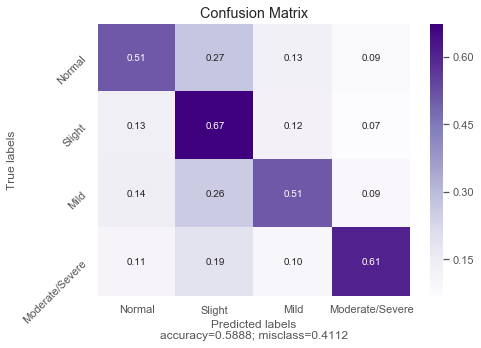

In [94]:
y_probmPower27, y_probmPower210, y_probmPower212, y_probmPower213 = Lstm.predict(mPowerX_test)
mp.calc_confusion_matrix_mPower(y_probmPower27, mPowery_test['27'], False)

                 precision    recall  f1-score   support

         Normal       0.63      0.66      0.65     10197
         Slight       0.65      0.70      0.67     11415
           Mild       0.62      0.50      0.56      3820
Moderate/Severe       0.64      0.40      0.49      1613

      micro avg       0.64      0.64      0.64     27045
      macro avg       0.64      0.57      0.59     27045
   weighted avg       0.64      0.64      0.64     27045



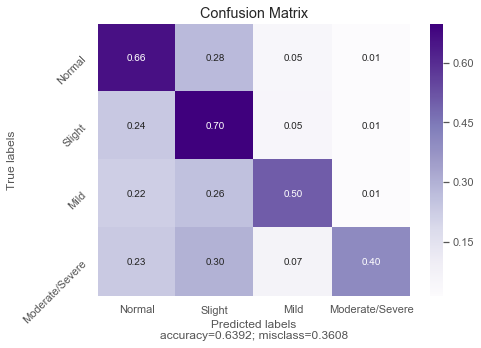

In [95]:
mp.calc_confusion_matrix_mPower(y_probmPower210, mPowery_test['210'], False)

                 precision    recall  f1-score   support

         Normal       0.65      0.60      0.62      8884
         Slight       0.64      0.74      0.69     11709
           Mild       0.69      0.58      0.63      5060
Moderate/Severe       0.63      0.45      0.52      1392

      micro avg       0.65      0.65      0.65     27045
      macro avg       0.65      0.59      0.62     27045
   weighted avg       0.65      0.65      0.65     27045



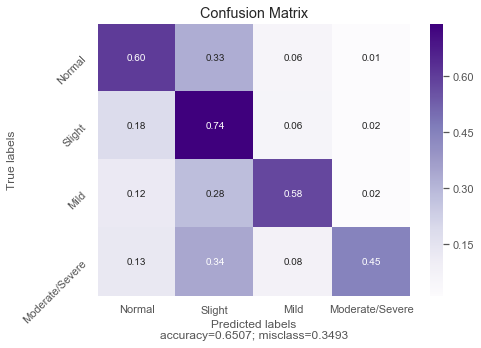

In [96]:
mp.calc_confusion_matrix_mPower(y_probmPower212, mPowery_test['212'], False)

                 precision    recall  f1-score   support

         Normal       0.85      0.93      0.89     20295
         Slight       0.64      0.49      0.55      5128
           Mild       0.62      0.32      0.42       684
Moderate/Severe       0.74      0.58      0.65       938

      micro avg       0.82      0.82      0.82     27045
      macro avg       0.71      0.58      0.63     27045
   weighted avg       0.80      0.82      0.80     27045



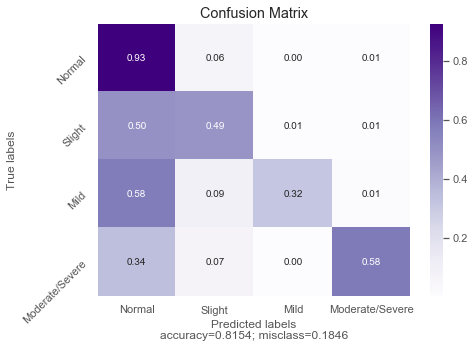

In [97]:
mp.calc_confusion_matrix_mPower(y_probmPower213, mPowery_test['213'], False)

## LSTM128 + 1FC (num epochs = 100, Dropout = 0.4)

In [44]:
inputL = Input(shape=(n_timesteps, n_features))
firstLstm = CuDNNLSTM(128)(inputL)
firstDrop = Dropout(0.4)(firstLstm)

fc1 = Dense(128, activation='relu')(firstDrop)
#fc2 = Dense(128, activation='relu')(fc1)

output27 = Dense(n_outputs, activation='softmax', name='2_7out')(fc1)
output210 = Dense(n_outputs, activation='softmax', name='2_10out')(fc1)
output212 = Dense(n_outputs, activation='softmax', name='2_12out')(fc1)
output213 = Dense(n_outputs, activation='softmax', name='2_13out')(fc1)

Lstm1Fc = Model(inputs=inputL, outputs=[output27, output210, output212, output213])
print(Lstm1Fc.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 6)       0                                            
__________________________________________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)        (None, 128)          69632       input_2[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 128)          0           cu_dnnlstm_2[0][0]               
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          16512       dropout_2[0][0]                  
__________________________________________________________________________________________________
2_7out (De

In [51]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
Lstm1Fc.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# And trained it via:
Lstm1FcH = Lstm1Fc.fit(mPowerX_train, [to_categorical(mPowery_train['27']),
                                      to_categorical(mPowery_train['210']),
                                      to_categorical(mPowery_train['212']),
                                      to_categorical(mPowery_train['213'])],
                                      validation_data=(mPowerX_test, [to_categorical(mPowery_test['27']),
                                                                      to_categorical(mPowery_test['210']),
                                                                      to_categorical(mPowery_test['212']),
                                                                      to_categorical(mPowery_test['213'])]),
                       epochs=50, batch_size=64)

Train on 108178 samples, validate on 27045 samples
Epoch 1/50
108178/108178 [==============================] - 57s 528us/step - loss: 2.5750 - 2_7out_loss: 0.8235 - 2_10out_loss: 0.7034 - 2_12out_loss: 0.6727 - 2_13out_loss: 0.3754 - 2_7out_acc: 0.6415 - 2_10out_acc: 0.6868 - 2_12out_acc: 0.7022 - 2_13out_acc: 0.8625 - val_loss: 2.9216 - val_2_7out_loss: 0.9144 - val_2_10out_loss: 0.7931 - val_2_12out_loss: 0.7646 - val_2_13out_loss: 0.4495 - val_2_7out_acc: 0.6082 - val_2_10out_acc: 0.6521 - val_2_12out_acc: 0.6701 - val_2_13out_acc: 0.8382: 0.6420 - 2_10out_acc: 0.6871 - 2_12out_acc: 0.7030 -  - ETA: 7s - loss: 2.5722 - 2_7out_loss: 0.8220 - 2_10out_loss: 0.7023 - 2_12out_loss: 0.6721 - 2_13out_loss: 0.3758 - 2_7out_acc: 0.6423 - 2_10out_acc: 0.6874 - 2_12out_acc: 0.7032 - 2_13out_acc: 0 - ETA: 7s - loss: 2.5717 - 2_7out_loss: 0.8219 - 2_10out_loss: 0.7021 - 2_12out_loss: 0.6720 - 2_13out_loss: 0.3758 - 2_7out_acc: 0.6423 - 2_10out_ - ETA: 4s - loss: 2.5742 - 2_7out_loss: 0.8224 - 2_

108178/108178 [==============================] - 57s 524us/step - loss: 2.4543 - 2_7out_loss: 0.7860 - 2_10out_loss: 0.6723 - 2_12out_loss: 0.6392 - 2_13out_loss: 0.3567 - 2_7out_acc: 0.6585 - 2_10out_acc: 0.6988 - 2_12out_acc: 0.7175 - 2_13out_acc: 0.8694 - val_loss: 3.1634 - val_2_7out_loss: 0.9867 - val_2_10out_loss: 0.8317 - val_2_12out_loss: 0.8257 - val_2_13out_loss: 0.5193 - val_2_7out_acc: 0.5929 - val_2_10out_acc: 0.6460 - val_2_12out_acc: 0.6522 - val_2_13out_acc: 0.8277s: 0.6360 - 2_13out_loss: 0.3588 - 2_7out_acc: 0.6598 - 2_10out_acc: 0.6983 - 2_12out_acc: 0.7141 - 2_13out - ETA: 47s - loss: 2.4589 - 2_7out_loss: 0.7914 - 2_10out_loss: 0.6707 - 2_12out_loss: 0.6370 - 2_13out_loss: 0.3599 - 2_7out_acc: 0.6597 - 2_10out_acc: 0.69 - ETA: 39s - loss: 2.4289 - 2_7out_loss:  - ETA: 28s - loss: 2.4332 - 2_7out_loss: 0.7776 - 2_10out_loss: - ETA: 24s - loss: 2.4313 - 2_7out_loss: 0.7787 - 2_10out_loss: 0.6668 - 2_12out_loss: 0.6319 - 2_13out_loss: 0.3539 - 2_7out_acc: 0.6622 - 2_1

108178/108178 [==============================] - 57s 528us/step - loss: 2.3620 - 2_7out_loss: 0.7585 - 2_10out_loss: 0.6462 - 2_12out_loss: 0.6166 - 2_13out_loss: 0.3408 - 2_7out_acc: 0.6715 - 2_10out_acc: 0.7111 - 2_12out_acc: 0.7268 - 2_13out_acc: 0.8756 - val_loss: 2.9254 - val_2_7out_loss: 0.9133 - val_2_10out_loss: 0.7914 - val_2_12out_loss: 0.7627 - val_2_13out_loss: 0.4580 - val_2_7out_acc: 0.6215 - val_2_10out_acc: 0.6649 - val_2_12out_acc: 0.6809 - val_2_13out_acc: 0.8400 2_12out_loss: 0.6190 -  - ETA: 5s - loss: 2.3612 - 2_7out_loss: 0.7579 - 2_10out_loss: 0.6470 - 2_12out_loss: 0.6154 - 2_13out_loss: 0.3410 - 2_7out_ac - ETA: 1s - loss: 2.3605 - 2_7out_loss: 0.7578 - 2_10out_loss: 0.6461 - 2_12out_loss: 0.6161 - 2_13out_loss: 0.3406 - 2_7out_acc: 0.6719 - 2_10out_acc: 0.7110 - 2_12out_acc: 0.7270 -
Epoch 33/50
108178/108178 [==============================] - 67s 616us/step - loss: 2.3535 - 2_7out_loss: 0.7557 - 2_10out_loss: 0.6446 - 2_12out_loss: 0.6142 - 2_13out_loss: 0.33

108178/108178 [==============================] - 56s 522us/step - loss: 2.2886 - 2_7out_loss: 0.7370 - 2_10out_loss: 0.6256 - 2_12out_loss: 0.5965 - 2_13out_loss: 0.3296 - 2_7out_acc: 0.6808 - 2_10out_acc: 0.7198 - 2_12out_acc: 0.7359 - 2_13out_acc: 0.8800 - val_loss: 2.9572 - val_2_7out_loss: 0.9160 - val_2_10out_loss: 0.7991 - val_2_12out_loss: 0.7761 - val_2_13out_loss: 0.4660 - val_2_7out_acc: 0.6247 - val_2_10out_acc: 0.6667 - val_2_12out_acc: 0.6805 - val_2_13out_acc: 0.8418s: 0.7139 - 2_10out_loss: 0.6058 - 2_12out_loss: 0.5804 - 2_13out_loss: 0.3191 - 2_7out_acc: 0.6891 - 2_10o - ETA: 44s - loss: 2.2135 - 2_7out_loss: 0.7135 - 2_10out_loss: 0.6010 - 2_12out_loss: 0.5780 - 2_13out_loss: 0.3211 - 2_7out_acc: 0.6898 - 2_10out_acc: 0.7284 - 2_12out - ETA: 43s - loss: 2.2092 - 2_7out_loss: 0.7114 - 2_10out_loss: 0.5990 - 2_12out_loss: 0.5786 - 2_13out_loss: 0.3203 - 2_7out_acc: 0.6925 - 2_10out_acc: 0.7295 - 2_12out_acc: 0.7425 - ETA: 42s - loss: 2.2086 - 2_7out_loss: 0.7125 - 2_10o

                 precision    recall  f1-score   support

         Normal       0.59      0.55      0.57      6111
         Slight       0.59      0.77      0.67      9564
           Mild       0.64      0.48      0.55      5637
Moderate/Severe       0.77      0.60      0.68      5733

      micro avg       0.63      0.63      0.63     27045
      macro avg       0.65      0.60      0.62     27045
   weighted avg       0.64      0.63      0.62     27045



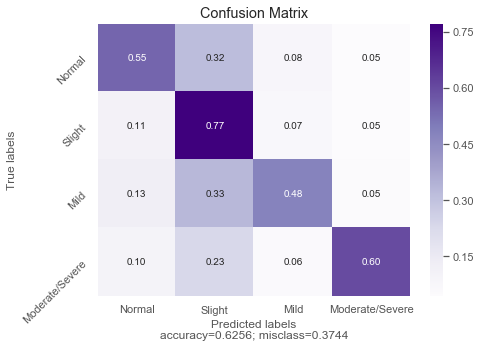

In [98]:
y_probmPower27, y_probmPower210, y_probmPower212, y_probmPower213 = Lstm1Fc.predict(mPowerX_test)
mp.calc_confusion_matrix_mPower(y_probmPower27, mPowery_test['27'], False)

                 precision    recall  f1-score   support

         Normal       0.63      0.74      0.68     10197
         Slight       0.67      0.70      0.69     11415
           Mild       0.78      0.49      0.60      3820
Moderate/Severe       0.75      0.42      0.54      1613

      micro avg       0.67      0.67      0.67     27045
      macro avg       0.71      0.58      0.63     27045
   weighted avg       0.68      0.67      0.66     27045



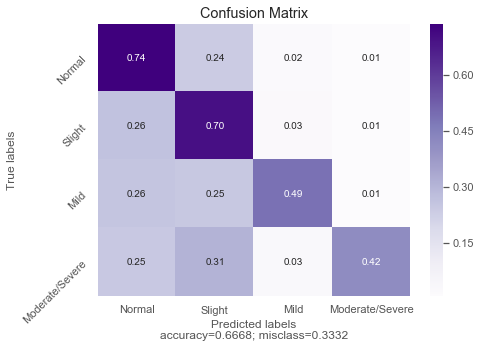

In [99]:
mp.calc_confusion_matrix_mPower(y_probmPower210, mPowery_test['210'], False)

                 precision    recall  f1-score   support

         Normal       0.69      0.63      0.66      8884
         Slight       0.65      0.79      0.71     11709
           Mild       0.80      0.57      0.67      5060
Moderate/Severe       0.78      0.48      0.59      1392

      micro avg       0.68      0.68      0.68     27045
      macro avg       0.73      0.62      0.66     27045
   weighted avg       0.70      0.68      0.68     27045



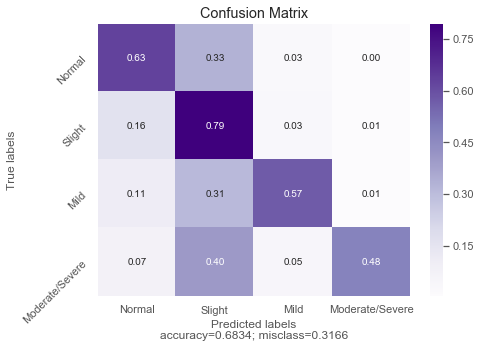

In [100]:
mp.calc_confusion_matrix_mPower(y_probmPower212, mPowery_test['212'], False)

                 precision    recall  f1-score   support

         Normal       0.85      0.97      0.90     20295
         Slight       0.81      0.44      0.57      5128
           Mild       0.79      0.39      0.53       684
Moderate/Severe       0.83      0.61      0.70       938

      micro avg       0.84      0.84      0.84     27045
      macro avg       0.82      0.60      0.68     27045
   weighted avg       0.84      0.84      0.82     27045



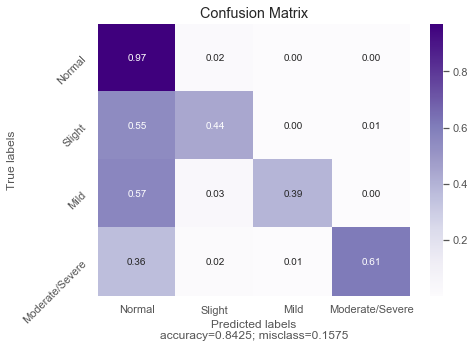

In [101]:
mp.calc_confusion_matrix_mPower(y_probmPower213, mPowery_test['213'], False)

## LSTM + 2FC

In [78]:
inputL = Input(shape=(n_timesteps, n_features))
firstLstm = CuDNNLSTM(128)(inputL)
firstDrop = Dropout(0.3)(firstLstm)

fc1 = Dense(128, activation='relu')(firstDrop)
fc2 = Dense(128, activation='relu')(fc1)

output27 = Dense(n_outputs, activation='softmax', name='2_7out')(fc2)
output210 = Dense(n_outputs, activation='softmax', name='2_10out')(fc2)
output212 = Dense(n_outputs, activation='softmax', name='2_12out')(fc2)
output213 = Dense(n_outputs, activation='softmax', name='2_13out')(fc2)

Lstm2Fc = Model(inputs=inputL, outputs=[output27, output210, output212, output213])
print(Lstm2Fc.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 128, 6)       0                                            
__________________________________________________________________________________________________
cu_dnnlstm_7 (CuDNNLSTM)        (None, 128)          69632       input_7[0][0]                    
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 128)          0           cu_dnnlstm_7[0][0]               
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          16512       dropout_5[0][0]                  
__________________________________________________________________________________________________
dense_4 (D

In [86]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
Lstm2Fc.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# And trained it via:
Lstm1FcH = Lstm2Fc.fit(mPowerX_train, [to_categorical(mPowery_train['27']),
                                                              to_categorical(mPowery_train['210']),
                                                              to_categorical(mPowery_train['212']),
                                                              to_categorical(mPowery_train['213'])],
                                      validation_data=(mPowerX_test, [to_categorical(mPowery_test['27']),
                                                                              to_categorical(mPowery_test['210']),
                                                                              to_categorical(mPowery_test['212']),
                                                                              to_categorical(mPowery_test['213'])]),
                       epochs=200, batch_size=128)

Train on 108178 samples, validate on 27045 samples
Epoch 1/200
108178/108178 [==============================] - 40s 365us/step - loss: 4.4683 - 2_7out_loss: 1.3598 - 2_10out_loss: 1.1800 - 2_12out_loss: 1.1871 - 2_13out_loss: 0.7414 - 2_7out_acc: 0.3534 - 2_10out_acc: 0.4185 - 2_12out_acc: 0.4331 - 2_13out_acc: 0.7512 - val_loss: 4.4346 - val_2_7out_loss: 1.3557 - val_2_10out_loss: 1.1769 - val_2_12out_loss: 1.1662 - val_2_13out_loss: 0.7358 - val_2_7out_acc: 0.3541 - val_2_10out_acc: 0.4221 - val_2_12out_acc: 0.4400 - val_2_13out_acc: 0.7504
Epoch 2/200
108178/108178 [==============================] - 35s 321us/step - loss: 4.3953 - 2_7out_loss: 1.3507 - 2_10out_loss: 1.1664 - 2_12out_loss: 1.1600 - 2_13out_loss: 0.7182 - 2_7out_acc: 0.3601 - 2_10out_acc: 0.4282 - 2_12out_acc: 0.4438 - 2_13out_acc: 0.7515 - val_loss: 4.3628 - val_2_7out_loss: 1.3422 - val_2_10out_loss: 1.1614 - val_2_12out_loss: 1.1465 - val_2_13out_loss: 0.7127 - val_2_7out_acc: 0.3633 - val_2_10out_acc: 0.4451 - val

108178/108178 [==============================] - 35s 325us/step - loss: 2.9002 - 2_7out_loss: 0.9212 - 2_10out_loss: 0.7841 - 2_12out_loss: 0.7585 - 2_13out_loss: 0.4365 - 2_7out_acc: 0.5990 - 2_10out_acc: 0.6501 - 2_12out_acc: 0.6639 - 2_13out_acc: 0.8395 - val_loss: 3.0835 - val_2_7out_loss: 0.9676 - val_2_10out_loss: 0.8300 - val_2_12out_loss: 0.8045 - val_2_13out_loss: 0.4813 - val_2_7out_acc: 0.5800 - val_2_10out_acc: 0.6301 - val_2_12out_acc: 0.6438 - val_2_13out_acc: 0.8237
Epoch 34/200
108178/108178 [==============================] - 35s 322us/step - loss: 2.8872 - 2_7out_loss: 0.9174 - 2_10out_loss: 0.7796 - 2_12out_loss: 0.7547 - 2_13out_loss: 0.4354 - 2_7out_acc: 0.6006 - 2_10out_acc: 0.6509 - 2_12out_acc: 0.6648 - 2_13out_acc: 0.8404 - val_loss: 3.0675 - val_2_7out_loss: 0.9575 - val_2_10out_loss: 0.8268 - val_2_12out_loss: 0.8043 - val_2_13out_loss: 0.4789 - val_2_7out_acc: 0.5884 - val_2_10out_acc: 0.6341 - val_2_12out_acc: 0.6472 - val_2_13out_acc: 0.8264
Epoch 35/200
10

108178/108178 [==============================] - 34s 318us/step - loss: 2.4938 - 2_7out_loss: 0.8020 - 2_10out_loss: 0.6763 - 2_12out_loss: 0.6504 - 2_13out_loss: 0.3651 - 2_7out_acc: 0.6530 - 2_10out_acc: 0.6994 - 2_12out_acc: 0.7140 - 2_13out_acc: 0.8656 - val_loss: 2.9850 - val_2_7out_loss: 0.9296 - val_2_10out_loss: 0.8051 - val_2_12out_loss: 0.7828 - val_2_13out_loss: 0.4675 - val_2_7out_acc: 0.6108 - val_2_10out_acc: 0.6572 - val_2_12out_acc: 0.6700 - val_2_13out_acc: 0.8345
Epoch 66/200
108178/108178 [==============================] - 34s 318us/step - loss: 2.4894 - 2_7out_loss: 0.7975 - 2_10out_loss: 0.6762 - 2_12out_loss: 0.6510 - 2_13out_loss: 0.3647 - 2_7out_acc: 0.6551 - 2_10out_acc: 0.6994 - 2_12out_acc: 0.7125 - 2_13out_acc: 0.8659 - val_loss: 3.0033 - val_2_7out_loss: 0.9369 - val_2_10out_loss: 0.8071 - val_2_12out_loss: 0.7880 - val_2_13out_loss: 0.4712 - val_2_7out_acc: 0.6107 - val_2_10out_acc: 0.6521 - val_2_12out_acc: 0.6711 - val_2_13out_acc: 0.8345
Epoch 67/200
10

108178/108178 [==============================] - 35s 325us/step - loss: 2.2989 - 2_7out_loss: 0.7439 - 2_10out_loss: 0.6224 - 2_12out_loss: 0.6011 - 2_13out_loss: 0.3314 - 2_7out_acc: 0.6784 - 2_10out_acc: 0.7244 - 2_12out_acc: 0.7358 - 2_13out_acc: 0.8775 - val_loss: 3.0233 - val_2_7out_loss: 0.9340 - val_2_10out_loss: 0.8146 - val_2_12out_loss: 0.7939 - val_2_13out_loss: 0.4808 - val_2_7out_acc: 0.6184 - val_2_10out_acc: 0.6656 - val_2_12out_acc: 0.6742 - val_2_13out_acc: 0.8368
Epoch 98/200
108178/108178 [==============================] - 35s 320us/step - loss: 2.3033 - 2_7out_loss: 0.7428 - 2_10out_loss: 0.6255 - 2_12out_loss: 0.6019 - 2_13out_loss: 0.3331 - 2_7out_acc: 0.6793 - 2_10out_acc: 0.7251 - 2_12out_acc: 0.7359 - 2_13out_acc: 0.8781 - val_loss: 3.0485 - val_2_7out_loss: 0.9451 - val_2_10out_loss: 0.8169 - val_2_12out_loss: 0.7975 - val_2_13out_loss: 0.4889 - val_2_7out_acc: 0.6160 - val_2_10out_acc: 0.6610 - val_2_12out_acc: 0.6762 - val_2_13out_acc: 0.8359
Epoch 99/200
10

108178/108178 [==============================] - 45s 414us/step - loss: 2.1714 - 2_7out_loss: 0.7053 - 2_10out_loss: 0.5899 - 2_12out_loss: 0.5661 - 2_13out_loss: 0.3101 - 2_7out_acc: 0.6962 - 2_10out_acc: 0.7405 - 2_12out_acc: 0.7510 - 2_13out_acc: 0.8858 - val_loss: 2.9869 - val_2_7out_loss: 0.9275 - val_2_10out_loss: 0.8028 - val_2_12out_loss: 0.7796 - val_2_13out_loss: 0.4770 - val_2_7out_acc: 0.6229 - val_2_10out_acc: 0.6624 - val_2_12out_acc: 0.6801 - val_2_13out_acc: 0.8379
Epoch 130/200
108178/108178 [==============================] - 37s 339us/step - loss: 2.1769 - 2_7out_loss: 0.7069 - 2_10out_loss: 0.5894 - 2_12out_loss: 0.5680 - 2_13out_loss: 0.3126 - 2_7out_acc: 0.6963 - 2_10out_acc: 0.7410 - 2_12out_acc: 0.7515 - 2_13out_acc: 0.8856 - val_loss: 3.0885 - val_2_7out_loss: 0.9596 - val_2_10out_loss: 0.8283 - val_2_12out_loss: 0.8053 - val_2_13out_loss: 0.4952 - val_2_7out_acc: 0.6212 - val_2_10out_acc: 0.6667 - val_2_12out_acc: 0.6811 - val_2_13out_acc: 0.8362
Epoch 131/200


108178/108178 [==============================] - 42s 385us/step - loss: 2.1082 - 2_7out_loss: 0.6877 - 2_10out_loss: 0.5731 - 2_12out_loss: 0.5482 - 2_13out_loss: 0.2992 - 2_7out_acc: 0.7049 - 2_10out_acc: 0.7479 - 2_12out_acc: 0.7601 - 2_13out_acc: 0.8899 - val_loss: 3.0940 - val_2_7out_loss: 0.9570 - val_2_10out_loss: 0.8346 - val_2_12out_loss: 0.8080 - val_2_13out_loss: 0.4945 - val_2_7out_acc: 0.6250 - val_2_10out_acc: 0.6712 - val_2_12out_acc: 0.6789 - val_2_13out_acc: 0.8387
Epoch 162/200
108178/108178 [==============================] - 42s 388us/step - loss: 2.0805 - 2_7out_loss: 0.6788 - 2_10out_loss: 0.5659 - 2_12out_loss: 0.5420 - 2_13out_loss: 0.2938 - 2_7out_acc: 0.7092 - 2_10out_acc: 0.7528 - 2_12out_acc: 0.7630 - 2_13out_acc: 0.8920 - val_loss: 3.1300 - val_2_7out_loss: 0.9634 - val_2_10out_loss: 0.8430 - val_2_12out_loss: 0.8150 - val_2_13out_loss: 0.5086 - val_2_7out_acc: 0.6233 - val_2_10out_acc: 0.6650 - val_2_12out_acc: 0.6784 - val_2_13out_acc: 0.8352
Epoch 163/200


108178/108178 [==============================] - 37s 343us/step - loss: 2.0333 - 2_7out_loss: 0.6648 - 2_10out_loss: 0.5537 - 2_12out_loss: 0.5286 - 2_13out_loss: 0.2861 - 2_7out_acc: 0.7157 - 2_10out_acc: 0.7569 - 2_12out_acc: 0.7686 - 2_13out_acc: 0.8944 - val_loss: 3.2259 - val_2_7out_loss: 0.9908 - val_2_10out_loss: 0.8711 - val_2_12out_loss: 0.8438 - val_2_13out_loss: 0.5202 - val_2_7out_acc: 0.6235 - val_2_10out_acc: 0.6656 - val_2_12out_acc: 0.6808 - val_2_13out_acc: 0.8361
Epoch 194/200
108178/108178 [==============================] - 50s 463us/step - loss: 2.0282 - 2_7out_loss: 0.6633 - 2_10out_loss: 0.5510 - 2_12out_loss: 0.5300 - 2_13out_loss: 0.2840 - 2_7out_acc: 0.7165 - 2_10out_acc: 0.7589 - 2_12out_acc: 0.7684 - 2_13out_acc: 0.8958 - val_loss: 3.2015 - val_2_7out_loss: 0.9840 - val_2_10out_loss: 0.8607 - val_2_12out_loss: 0.8367 - val_2_13out_loss: 0.5201 - val_2_7out_acc: 0.6240 - val_2_10out_acc: 0.6670 - val_2_12out_acc: 0.6819 - val_2_13out_acc: 0.8348
Epoch 195/200


                 precision    recall  f1-score   support

         Normal       0.60      0.54      0.57      6111
         Slight       0.60      0.76      0.67      9564
           Mild       0.62      0.50      0.55      5637
Moderate/Severe       0.72      0.62      0.67      5733

      micro avg       0.62      0.62      0.62     27045
      macro avg       0.63      0.60      0.61     27045
   weighted avg       0.63      0.62      0.62     27045



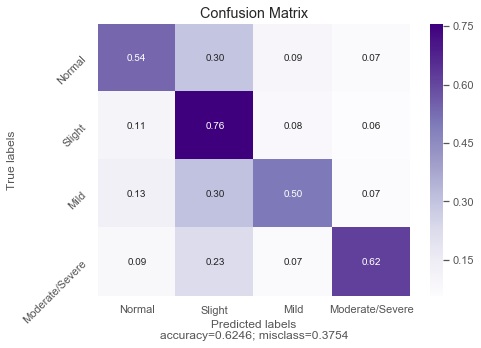

In [89]:
y_probmPower27, y_probmPower210, y_probmPower212, y_probmPower213 = Lstm2Fc.predict(mPowerX_test)
mp.calc_confusion_matrix_mPower(y_probmPower27, mPowery_test['27'], False)

                 precision    recall  f1-score   support

         Normal       0.65      0.69      0.67     10197
         Slight       0.67      0.73      0.70     11415
           Mild       0.72      0.49      0.58      3820
Moderate/Severe       0.70      0.44      0.54      1613

      micro avg       0.67      0.67      0.67     27045
      macro avg       0.68      0.59      0.62     27045
   weighted avg       0.67      0.67      0.66     27045



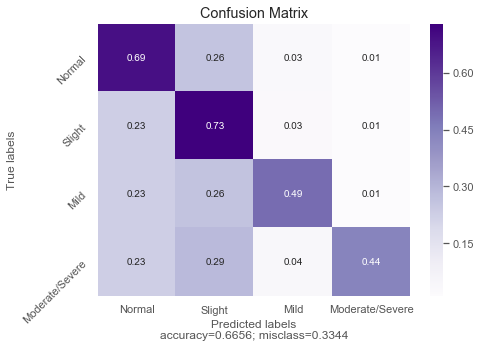

In [91]:
mp.calc_confusion_matrix_mPower(y_probmPower210, mPowery_test['210'], False)

                 precision    recall  f1-score   support

         Normal       0.71      0.60      0.65      8884
         Slight       0.65      0.80      0.71     11709
           Mild       0.75      0.60      0.67      5060
Moderate/Severe       0.72      0.49      0.58      1392

      micro avg       0.68      0.68      0.68     27045
      macro avg       0.71      0.62      0.65     27045
   weighted avg       0.69      0.68      0.68     27045



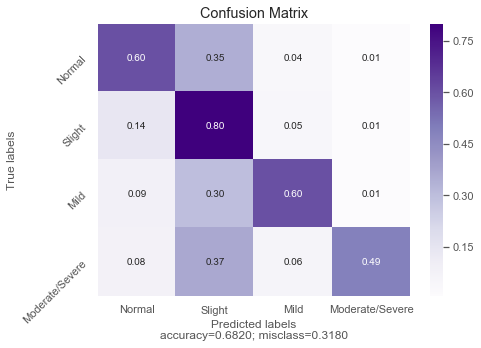

In [92]:
mp.calc_confusion_matrix_mPower(y_probmPower212, mPowery_test['212'], False)

                 precision    recall  f1-score   support

         Normal       0.85      0.95      0.90     20295
         Slight       0.74      0.50      0.59      5128
           Mild       0.75      0.38      0.51       684
Moderate/Severe       0.78      0.55      0.64       938

      micro avg       0.84      0.84      0.84     27045
      macro avg       0.78      0.60      0.66     27045
   weighted avg       0.83      0.84      0.82     27045



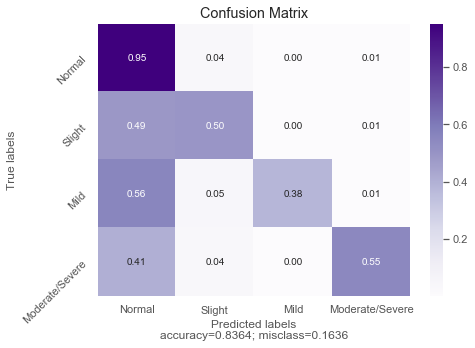

In [93]:
mp.calc_confusion_matrix_mPower(y_probmPower213, mPowery_test['213'], False)

# LSTM + 3FC

In [102]:
inputL = Input(shape=(n_timesteps, n_features))
firstLstm = CuDNNLSTM(128)(inputL)
#firstDrop = Dropout(0.4)(firstLstm)

fc1 = Dense(128, activation='relu')(firstLstm)
fc2 = Dense(128, activation='relu')(fc1)
fc3 = Dense(128, activation='relu')(fc2)

output27 = Dense(n_outputs, activation='softmax', name='2_7out')(fc3)
output210 = Dense(n_outputs, activation='softmax', name='2_10out')(fc3)
output212 = Dense(n_outputs, activation='softmax', name='2_12out')(fc3)
output213 = Dense(n_outputs, activation='softmax', name='2_13out')(fc3)

Lstm3Fc = Model(inputs=inputL, outputs=[output27, output210, output212, output213])
print(Lstm3Fc.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 128, 6)       0                                            
__________________________________________________________________________________________________
cu_dnnlstm_8 (CuDNNLSTM)        (None, 128)          69632       input_8[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 128)          16512       cu_dnnlstm_8[0][0]               
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 128)          16512       dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (D

In [106]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
rms = RMSprop()
Lstm3Fc.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy'])


# And trained it via:
Lstm3FcH = Lstm3Fc.fit(mPowerX_train, [to_categorical(mPowery_train['27']),
                                                              to_categorical(mPowery_train['210']),
                                                              to_categorical(mPowery_train['212']),
                                                              to_categorical(mPowery_train['213'])],
                                      validation_data=(mPowerX_test, [to_categorical(mPowery_test['27']),
                                                                      to_categorical(mPowery_test['210']),
                                                                      to_categorical(mPowery_test['212']),
                                                                      to_categorical(mPowery_test['213'])]),
                       epochs=200, batch_size=128)

Train on 108178 samples, validate on 27045 samples
Epoch 1/200
108178/108178 [==============================] - 38s 347us/step - loss: 4.4413 - 2_7out_loss: 1.3573 - 2_10out_loss: 1.1739 - 2_12out_loss: 1.1782 - 2_13out_loss: 0.7319 - 2_7out_acc: 0.3535 - 2_10out_acc: 0.4249 - 2_12out_acc: 0.4345 - 2_13out_acc: 0.7510 - val_loss: 4.3777 - val_2_7out_loss: 1.3484 - val_2_10out_loss: 1.1579 - val_2_12out_loss: 1.1546 - val_2_13out_loss: 0.7168 - val_2_7out_acc: 0.3597 - val_2_10out_acc: 0.4472 - val_2_12out_acc: 0.4414 - val_2_13out_acc: 0.7517
Epoch 2/200
108178/108178 [==============================] - 36s 331us/step - loss: 4.2911 - 2_7out_loss: 1.3278 - 2_10out_loss: 1.1309 - 2_12out_loss: 1.1382 - 2_13out_loss: 0.6943 - 2_7out_acc: 0.3750 - 2_10out_acc: 0.4535 - 2_12out_acc: 0.4590 - 2_13out_acc: 0.7544 - val_loss: 4.2593 - val_2_7out_loss: 1.3259 - val_2_10out_loss: 1.1216 - val_2_12out_loss: 1.1191 - val_2_13out_loss: 0.6927 - val_2_7out_acc: 0.3771 - val_2_10out_acc: 0.4604 - val

Epoch 33/200
108178/108178 [==============================] - 41s 375us/step - loss: 2.7437 - 2_7out_loss: 0.8742 - 2_10out_loss: 0.7381 - 2_12out_loss: 0.7179 - 2_13out_loss: 0.4134 - 2_7out_acc: 0.6206 - 2_10out_acc: 0.6717 - 2_12out_acc: 0.6827 - 2_13out_acc: 0.8457 - val_loss: 3.2900 - val_2_7out_loss: 1.0413 - val_2_10out_loss: 0.8718 - val_2_12out_loss: 0.8513 - val_2_13out_loss: 0.5255 - val_2_7out_acc: 0.5434 - val_2_10out_acc: 0.6207 - val_2_12out_acc: 0.6342 - val_2_13out_acc: 0.8176
Epoch 34/200
108178/108178 [==============================] - 39s 363us/step - loss: 2.7305 - 2_7out_loss: 0.8714 - 2_10out_loss: 0.7340 - 2_12out_loss: 0.7128 - 2_13out_loss: 0.4124 - 2_7out_acc: 0.6216 - 2_10out_acc: 0.6743 - 2_12out_acc: 0.6824 - 2_13out_acc: 0.8464 - val_loss: 3.3589 - val_2_7out_loss: 1.0408 - val_2_10out_loss: 0.8904 - val_2_12out_loss: 0.8821 - val_2_13out_loss: 0.5456 - val_2_7out_acc: 0.5633 - val_2_10out_acc: 0.6268 - val_2_12out_acc: 0.6256 - val_2_13out_acc: 0.8178
Ep

108178/108178 [==============================] - 35s 319us/step - loss: 2.4105 - 2_7out_loss: 0.7737 - 2_10out_loss: 0.6502 - 2_12out_loss: 0.6323 - 2_13out_loss: 0.3543 - 2_7out_acc: 0.6645 - 2_10out_acc: 0.7140 - 2_12out_acc: 0.7216 - 2_13out_acc: 0.8687 - val_loss: 3.9332 - val_2_7out_loss: 1.1485 - val_2_10out_loss: 0.9954 - val_2_12out_loss: 1.0590 - val_2_13out_loss: 0.7303 - val_2_7out_acc: 0.5734 - val_2_10out_acc: 0.6282 - val_2_12out_acc: 0.6122 - val_2_13out_acc: 0.7712
Epoch 66/200
108178/108178 [==============================] - 35s 320us/step - loss: 2.4084 - 2_7out_loss: 0.7750 - 2_10out_loss: 0.6496 - 2_12out_loss: 0.6330 - 2_13out_loss: 0.3508 - 2_7out_acc: 0.6653 - 2_10out_acc: 0.7156 - 2_12out_acc: 0.7213 - 2_13out_acc: 0.8693 - val_loss: 3.6760 - val_2_7out_loss: 1.1110 - val_2_10out_loss: 0.9834 - val_2_12out_loss: 0.9597 - val_2_13out_loss: 0.6219 - val_2_7out_acc: 0.5852 - val_2_10out_acc: 0.6409 - val_2_12out_acc: 0.6453 - val_2_13out_acc: 0.8171
Epoch 67/200
10

108178/108178 [==============================] - 34s 316us/step - loss: 2.2813 - 2_7out_loss: 0.7379 - 2_10out_loss: 0.6149 - 2_12out_loss: 0.5979 - 2_13out_loss: 0.3306 - 2_7out_acc: 0.6806 - 2_10out_acc: 0.7308 - 2_12out_acc: 0.7367 - 2_13out_acc: 0.8783 - val_loss: 3.6968 - val_2_7out_loss: 1.1417 - val_2_10out_loss: 0.9769 - val_2_12out_loss: 0.9532 - val_2_13out_loss: 0.6250 - val_2_7out_acc: 0.5568 - val_2_10out_acc: 0.6341 - val_2_12out_acc: 0.6452 - val_2_13out_acc: 0.8267loss: 0.7360 - 2_10out_loss: 0.6125 - 2_12out_loss: 0.5958 - 2_13out_loss: 0.3298 - 2
Epoch 97/200
108178/108178 [==============================] - 34s 315us/step - loss: 2.2804 - 2_7out_loss: 0.7357 - 2_10out_loss: 0.6141 - 2_12out_loss: 0.6014 - 2_13out_loss: 0.3293 - 2_7out_acc: 0.6826 - 2_10out_acc: 0.7324 - 2_12out_acc: 0.7353 - 2_13out_acc: 0.8802 - val_loss: 3.8002 - val_2_7out_loss: 1.1323 - val_2_10out_loss: 1.0134 - val_2_12out_loss: 0.9897 - val_2_13out_loss: 0.6648 - val_2_7out_acc: 0.5815 - val_2_

108178/108178 [==============================] - 34s 317us/step - loss: 2.2001 - 2_7out_loss: 0.7154 - 2_10out_loss: 0.5943 - 2_12out_loss: 0.5745 - 2_13out_loss: 0.3159 - 2_7out_acc: 0.6921 - 2_10out_acc: 0.7415 - 2_12out_acc: 0.7482 - 2_13out_acc: 0.8855 - val_loss: 5.3702 - val_2_7out_loss: 1.5639 - val_2_10out_loss: 1.4258 - val_2_12out_loss: 1.3860 - val_2_13out_loss: 0.9945 - val_2_7out_acc: 0.5919 - val_2_10out_acc: 0.6368 - val_2_12out_acc: 0.6466 - val_2_13out_acc: 0.8233
Epoch 127/200
108178/108178 [==============================] - 34s 318us/step - loss: 2.1988 - 2_7out_loss: 0.7132 - 2_10out_loss: 0.5953 - 2_12out_loss: 0.5767 - 2_13out_loss: 0.3137 - 2_7out_acc: 0.6912 - 2_10out_acc: 0.7402 - 2_12out_acc: 0.7472 - 2_13out_acc: 0.8854 - val_loss: 4.2785 - val_2_7out_loss: 1.2567 - val_2_10out_loss: 1.1492 - val_2_12out_loss: 1.1217 - val_2_13out_loss: 0.7509 - val_2_7out_acc: 0.5924 - val_2_10out_acc: 0.6460 - val_2_12out_acc: 0.6333 - val_2_13out_acc: 0.8138
Epoch 128/200


Epoch 141/200
108178/108178 [==============================] - 34s 317us/step - loss: 2.2035 - 2_7out_loss: 0.7147 - 2_10out_loss: 0.5966 - 2_12out_loss: 0.5760 - 2_13out_loss: 0.3162 - 2_7out_acc: 0.6915 - 2_10out_acc: 0.7406 - 2_12out_acc: 0.7472 - 2_13out_acc: 0.8857 - val_loss: 4.0212 - val_2_7out_loss: 1.1716 - val_2_10out_loss: 1.0810 - val_2_12out_loss: 1.0548 - val_2_13out_loss: 0.7137 - val_2_7out_acc: 0.5746 - val_2_10out_acc: 0.6246 - val_2_12out_acc: 0.6312 - val_2_13out_acc: 0.7967
Epoch 142/200
108178/108178 [==============================] - 35s 320us/step - loss: 2.1858 - 2_7out_loss: 0.7108 - 2_10out_loss: 0.5917 - 2_12out_loss: 0.5706 - 2_13out_loss: 0.3127 - 2_7out_acc: 0.6928 - 2_10out_acc: 0.7414 - 2_12out_acc: 0.7500 - 2_13out_acc: 0.8867 - val_loss: 4.1987 - val_2_7out_loss: 1.2519 - val_2_10out_loss: 1.1264 - val_2_12out_loss: 1.0903 - val_2_13out_loss: 0.7301 - val_2_7out_acc: 0.5880 - val_2_10out_acc: 0.6406 - val_2_12out_acc: 0.6510 - val_2_13out_acc: 0.8206


Epoch 157/200
108178/108178 [==============================] - 34s 318us/step - loss: 2.1733 - 2_7out_loss: 0.7066 - 2_10out_loss: 0.5890 - 2_12out_loss: 0.5672 - 2_13out_loss: 0.3105 - 2_7out_acc: 0.6952 - 2_10out_acc: 0.7426 - 2_12out_acc: 0.7527 - 2_13out_acc: 0.8880 - val_loss: 4.2190 - val_2_7out_loss: 1.2491 - val_2_10out_loss: 1.1361 - val_2_12out_loss: 1.1100 - val_2_13out_loss: 0.7238 - val_2_7out_acc: 0.5872 - val_2_10out_acc: 0.6314 - val_2_12out_acc: 0.6494 - val_2_13out_acc: 0.8243A: 11s - loss: 2.1438 - 2_7out_loss: 0.6986 - 2_10out_loss: 0.5806 - 2_12out_loss: 0.5605 - 2_13out_loss: 0.3040 - 2_7out_acc: 0.6991 - 2_10out_acc - ETA: 8s - loss: 2.1517 - 2_7out_loss: 0.7009 - 2_10out_loss: 0.5826 - 2_12out_loss: 0.5627 - 2_13out_lo - ETA: 1s - loss: 2.1717 - 2_7out_loss: 0.7061 - 2_10out_loss: 0.5885 - 2_12out_loss: 0.5664 - 2_13out_loss: 0.3107 - 2_7out_acc: 0.6950 - 2_10out_acc: 0.7426 - 2_12out_acc: 0.7530
Epoch 158/200
108178/108178 [==============================] - 35s

108178/108178 [==============================] - 36s 331us/step - loss: 2.1630 - 2_7out_loss: 0.7040 - 2_10out_loss: 0.5862 - 2_12out_loss: 0.5650 - 2_13out_loss: 0.3078 - 2_7out_acc: 0.6970 - 2_10out_acc: 0.7453 - 2_12out_acc: 0.7532 - 2_13out_acc: 0.8906 - val_loss: 4.4505 - val_2_7out_loss: 1.2653 - val_2_10out_loss: 1.1844 - val_2_12out_loss: 1.1600 - val_2_13out_loss: 0.8409 - val_2_7out_acc: 0.5728 - val_2_10out_acc: 0.6321 - val_2_12out_acc: 0.6116 - val_2_13out_acc: 0.7757
Epoch 186/200
108178/108178 [==============================] - 56s 516us/step - loss: 2.1685 - 2_7out_loss: 0.7048 - 2_10out_loss: 0.5871 - 2_12out_loss: 0.5676 - 2_13out_loss: 0.3089 - 2_7out_acc: 0.6972 - 2_10out_acc: 0.7453 - 2_12out_acc: 0.7520 - 2_13out_acc: 0.8891 - val_loss: 4.3908 - val_2_7out_loss: 1.2814 - val_2_10out_loss: 1.1786 - val_2_12out_loss: 1.1452 - val_2_13out_loss: 0.7857 - val_2_7out_acc: 0.5870 - val_2_10out_acc: 0.6393 - val_2_12out_acc: 0.6390 - val_2_13out_acc: 0.8084oss: 0.7035 - 2

                 precision    recall  f1-score   support

         Normal       0.41      0.70      0.52      6111
         Slight       0.65      0.56      0.60      9564
           Mild       0.62      0.42      0.50      5637
Moderate/Severe       0.72      0.55      0.63      5733

      micro avg       0.56      0.56      0.56     27045
      macro avg       0.60      0.56      0.56     27045
   weighted avg       0.60      0.56      0.57     27045



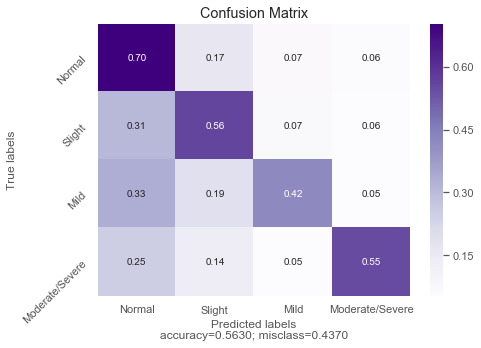

In [109]:
y_probmPower27, y_probmPower210, y_probmPower212, y_probmPower213 = Lstm3Fc.predict(mPowerX_test)
mp.calc_confusion_matrix_mPower(y_probmPower27, mPowery_test['27'], False)

                 precision    recall  f1-score   support

         Normal       0.56      0.77      0.65     10197
         Slight       0.69      0.61      0.64     11415
           Mild       0.74      0.45      0.56      3820
Moderate/Severe       0.75      0.37      0.49      1613

      micro avg       0.63      0.63      0.63     27045
      macro avg       0.69      0.55      0.59     27045
   weighted avg       0.65      0.63      0.62     27045



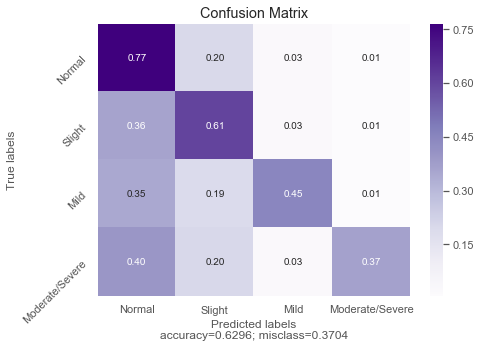

In [110]:
mp.calc_confusion_matrix_mPower(y_probmPower210, mPowery_test['210'], False)

                 precision    recall  f1-score   support

         Normal       0.73      0.48      0.58      8884
         Slight       0.60      0.83      0.70     11709
           Mild       0.71      0.57      0.63      5060
Moderate/Severe       0.65      0.46      0.54      1392

      micro avg       0.65      0.65      0.65     27045
      macro avg       0.67      0.58      0.61     27045
   weighted avg       0.66      0.65      0.64     27045



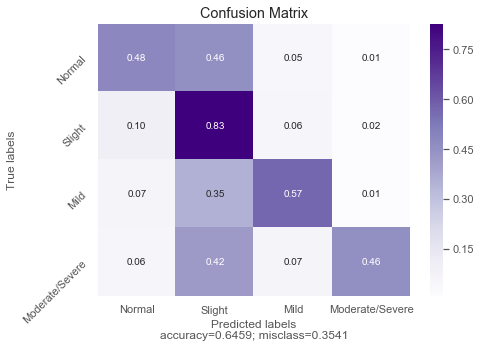

In [111]:
mp.calc_confusion_matrix_mPower(y_probmPower212, mPowery_test['212'], False)

                 precision    recall  f1-score   support

         Normal       0.84      0.95      0.89     20295
         Slight       0.73      0.43      0.54      5128
           Mild       0.66      0.32      0.43       684
Moderate/Severe       0.71      0.55      0.62       938

      micro avg       0.82      0.82      0.82     27045
      macro avg       0.73      0.56      0.62     27045
   weighted avg       0.81      0.82      0.80     27045



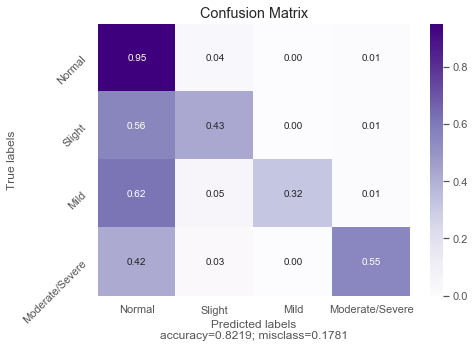

In [112]:
mp.calc_confusion_matrix_mPower(y_probmPower213, mPowery_test['213'], False)

# StackedLSTM2 + 1FC

In [6]:
inputL = Input(shape=(128, 6))
firstLstm = CuDNNLSTM(128, return_sequences = True)(inputL)
secondLstm =  CuDNNLSTM(128)(firstLstm)
#thirdLstm = CuDNNLSTM(128)(secondLstm)
firstDrop = Dropout(0.4)(secondLstm)

fc1 = Dense(128, activation='relu')(firstDrop)
#fc2 = Dense(128, activation='relu')(fc1)
#fc3 = Dense(128, activation='relu')(fc2)

output27 = Dense(4, activation='softmax', name='2_7out')(fc1)
output210 = Dense(4, activation='softmax', name='2_10out')(fc1)
output212 = Dense(4, activation='softmax', name='2_12out')(fc1)
output213 = Dense(4, activation='softmax', name='2_13out')(fc1)

StackedLstm2Fc1 = Model(inputs=inputL, outputs=[output27, output210, output212, output213])
print(StackedLstm2Fc1.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 6)       0                                            
__________________________________________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)        (None, 128, 128)     69632       input_2[0][0]                    
__________________________________________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)        (None, 128)          132096      cu_dnnlstm_3[0][0]               
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 128)          0           cu_dnnlstm_4[0][0]               
__________________________________________________________________________________________________
dense_2 (D

In [9]:
plot_model(StackedLstm2Fc1, to_file='StackedLstm2Fc1.png', show_shapes=True, show_layer_names=True)

In [8]:
StackedLstm2Fc1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 6)       0                                            
__________________________________________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)        (None, 128, 128)     69632       input_2[0][0]                    
__________________________________________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)        (None, 128)          132096      cu_dnnlstm_3[0][0]               
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 128)          0           cu_dnnlstm_4[0][0]               
__________________________________________________________________________________________________
dense_2 (D

In [118]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
StackedLstm1Fc.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# And trained it via:
StackedLstm1FcH = StackedLstm1Fc.fit(mPowerX_train, [to_categorical(mPowery_train['27']),
                                                              to_categorical(mPowery_train['210']),
                                                              to_categorical(mPowery_train['212']),
                                                              to_categorical(mPowery_train['213'])],
                                      validation_data=(mPowerX_test, [to_categorical(mPowery_test['27']),
                                                                              to_categorical(mPowery_test['210']),
                                                                              to_categorical(mPowery_test['212']),
                                                                              to_categorical(mPowery_test['213'])]),
                       epochs=200, batch_size=64)

Train on 108178 samples, validate on 27045 samples
Epoch 1/200
108178/108178 [==============================] - 103s 952us/step - loss: 4.4459 - 2_7out_loss: 1.3586 - 2_10out_loss: 1.1762 - 2_12out_loss: 1.1784 - 2_13out_loss: 0.7327 - 2_7out_acc: 0.3539 - 2_10out_acc: 0.4202 - 2_12out_acc: 0.4351 - 2_13out_acc: 0.7508 - val_loss: 4.3522 - val_2_7out_loss: 1.3374 - val_2_10out_loss: 1.1537 - val_2_12out_loss: 1.1503 - val_2_13out_loss: 0.7109 - val_2_7out_acc: 0.3720 - val_2_10out_acc: 0.4454 - val_2_12out_acc: 0.4491 - val_2_13out_acc: 0.7504
Epoch 2/200
108178/108178 [==============================] - 97s 899us/step - loss: 4.3164 - 2_7out_loss: 1.3324 - 2_10out_loss: 1.1415 - 2_12out_loss: 1.1432 - 2_13out_loss: 0.6993 - 2_7out_acc: 0.3747 - 2_10out_acc: 0.4492 - 2_12out_acc: 0.4611 - 2_13out_acc: 0.7545 - val_loss: 4.2205 - val_2_7out_loss: 1.3141 - val_2_10out_loss: 1.1150 - val_2_12out_loss: 1.1065 - val_2_13out_loss: 0.6850 - val_2_7out_acc: 0.3879 - val_2_10out_acc: 0.4602 - va

Epoch 33/200
108178/108178 [==============================] - 116s 1ms/step - loss: 2.1927 - 2_7out_loss: 0.7055 - 2_10out_loss: 0.5969 - 2_12out_loss: 0.5717 - 2_13out_loss: 0.3185 - 2_7out_acc: 0.6972 - 2_10out_acc: 0.7369 - 2_12out_acc: 0.7508 - 2_13out_acc: 0.8813 - val_loss: 2.7554 - val_2_7out_loss: 0.8551 - val_2_10out_loss: 0.7448 - val_2_12out_loss: 0.7229 - val_2_13out_loss: 0.4325 - val_2_7out_acc: 0.6450 - val_2_10out_acc: 0.6851 - val_2_12out_acc: 0.6996 - val_2_13out_acc: 0.8470
Epoch 34/200
108178/108178 [==============================] - 108s 996us/step - loss: 2.1706 - 2_7out_loss: 0.6973 - 2_10out_loss: 0.5907 - 2_12out_loss: 0.5671 - 2_13out_loss: 0.3154 - 2_7out_acc: 0.7010 - 2_10out_acc: 0.7403 - 2_12out_acc: 0.7524 - 2_13out_acc: 0.8823 - val_loss: 2.7126 - val_2_7out_loss: 0.8458 - val_2_10out_loss: 0.7326 - val_2_12out_loss: 0.7075 - val_2_13out_loss: 0.4267 - val_2_7out_acc: 0.6463 - val_2_10out_acc: 0.6902 - val_2_12out_acc: 0.7005 - val_2_13out_acc: 0.8483
Ep

108178/108178 [==============================] - 111s 1ms/step - loss: 1.7238 - 2_7out_loss: 0.5702 - 2_10out_loss: 0.4670 - 2_12out_loss: 0.4480 - 2_13out_loss: 0.2386 - 2_7out_acc: 0.7592 - 2_10out_acc: 0.7995 - 2_12out_acc: 0.8065 - 2_13out_acc: 0.9126 - val_loss: 2.9311 - val_2_7out_loss: 0.8795 - val_2_10out_loss: 0.7952 - val_2_12out_loss: 0.7696 - val_2_13out_loss: 0.4867 - val_2_7out_acc: 0.6590 - val_2_10out_acc: 0.6978 - val_2_12out_acc: 0.7099 - val_2_13out_acc: 0.8468
Epoch 66/200
108178/108178 [==============================] - 98s 909us/step - loss: 1.6991 - 2_7out_loss: 0.5638 - 2_10out_loss: 0.4604 - 2_12out_loss: 0.4408 - 2_13out_loss: 0.2342 - 2_7out_acc: 0.7613 - 2_10out_acc: 0.8028 - 2_12out_acc: 0.8095 - 2_13out_acc: 0.9133 - val_loss: 2.9756 - val_2_7out_loss: 0.9018 - val_2_10out_loss: 0.8116 - val_2_12out_loss: 0.7717 - val_2_13out_loss: 0.4905 - val_2_7out_acc: 0.6550 - val_2_10out_acc: 0.6958 - val_2_12out_acc: 0.7072 - val_2_13out_acc: 0.8444
Epoch 67/200
108

KeyboardInterrupt: 

                 precision    recall  f1-score   support

         Normal       0.66      0.56      0.61      6111
         Slight       0.64      0.77      0.70      9564
           Mild       0.64      0.57      0.60      5637
Moderate/Severe       0.74      0.67      0.71      5733

      micro avg       0.66      0.66      0.66     27045
      macro avg       0.67      0.65      0.65     27045
   weighted avg       0.67      0.66      0.66     27045



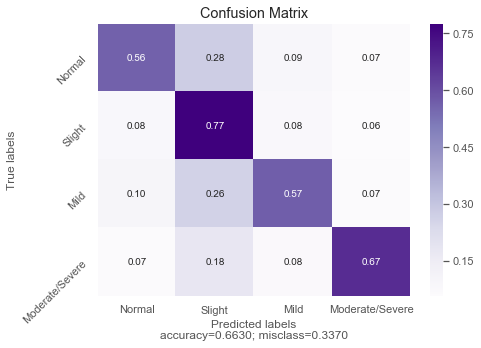

In [120]:
y_probmPower27, y_probmPower210, y_probmPower212, y_probmPower213 = StackedLstm1Fc.predict(mPowerX_test)
mp.calc_confusion_matrix_mPower(y_probmPower27, mPowery_test['27'], False)

                 precision    recall  f1-score   support

         Normal       0.68      0.74      0.71     10197
         Slight       0.71      0.74      0.73     11415
           Mild       0.74      0.55      0.63      3820
Moderate/Severe       0.69      0.50      0.58      1613

      micro avg       0.70      0.70      0.70     27045
      macro avg       0.70      0.63      0.66     27045
   weighted avg       0.70      0.70      0.70     27045



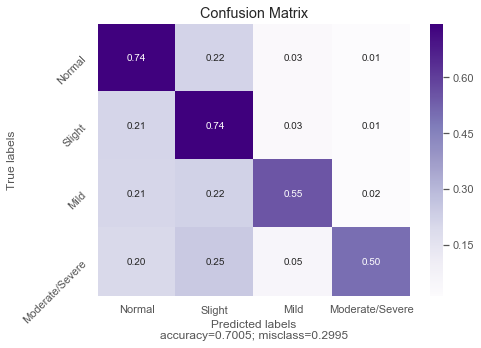

In [121]:
mp.calc_confusion_matrix_mPower(y_probmPower210, mPowery_test['210'], False)

                 precision    recall  f1-score   support

         Normal       0.71      0.67      0.69      8884
         Slight       0.69      0.79      0.74     11709
           Mild       0.75      0.65      0.69      5060
Moderate/Severe       0.75      0.51      0.61      1392

      micro avg       0.71      0.71      0.71     27045
      macro avg       0.73      0.66      0.68     27045
   weighted avg       0.71      0.71      0.71     27045



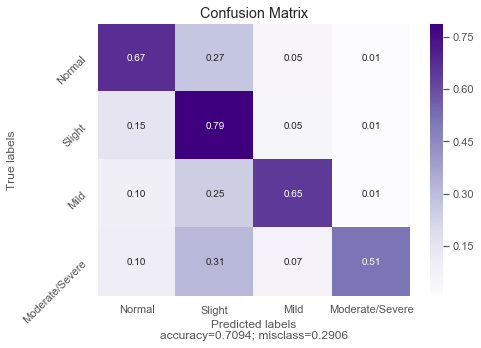

In [122]:
mp.calc_confusion_matrix_mPower(y_probmPower212, mPowery_test['212'], False)

                 precision    recall  f1-score   support

         Normal       0.87      0.94      0.90     20295
         Slight       0.72      0.56      0.63      5128
           Mild       0.69      0.51      0.59       684
Moderate/Severe       0.84      0.60      0.70       938

      micro avg       0.84      0.84      0.84     27045
      macro avg       0.78      0.65      0.70     27045
   weighted avg       0.84      0.84      0.84     27045



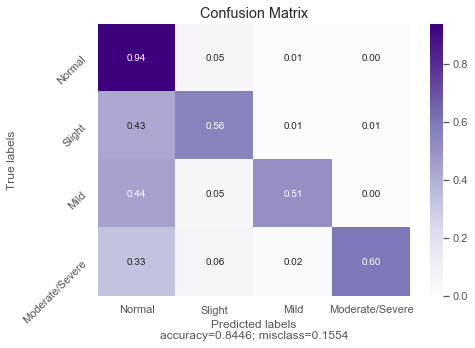

In [123]:
mp.calc_confusion_matrix_mPower(y_probmPower213, mPowery_test['213'], False)

## Stacked3LSTM + 2FC

In [125]:
inputL = Input(shape=(n_timesteps, n_features))
firstLstm = CuDNNLSTM(128, return_sequences = True)(inputL)
secondLstm =  CuDNNLSTM(128, return_sequences = True)(firstLstm)
thirdLstm = CuDNNLSTM(128)(secondLstm)
firstDrop = Dropout(0.2)(thirdLstm)

fc1 = Dense(128, activation='relu')(firstDrop)
#fc2 = Dense(128, activation='relu')(fc1)
#fc3 = Dense(128, activation='relu')(fc2)

output27 = Dense(n_outputs, activation='softmax', name='2_7out')(fc1)
output210 = Dense(n_outputs, activation='softmax', name='2_10out')(fc1)
output212 = Dense(n_outputs, activation='softmax', name='2_12out')(fc1)
output213 = Dense(n_outputs, activation='softmax', name='2_13out')(fc1)

StackedLstm2Fc = Model(inputs=inputL, outputs=[output27, output210, output212, output213])
print(StackedLstm2Fc.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 128, 6)       0                                            
__________________________________________________________________________________________________
cu_dnnlstm_16 (CuDNNLSTM)       (None, 128, 128)     69632       input_12[0][0]                   
__________________________________________________________________________________________________
cu_dnnlstm_17 (CuDNNLSTM)       (None, 128, 128)     132096      cu_dnnlstm_16[0][0]              
__________________________________________________________________________________________________
cu_dnnlstm_18 (CuDNNLSTM)       (None, 128)          132096      cu_dnnlstm_17[0][0]              
__________________________________________________________________________________________________
dropout_9 

In [128]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
StackedLstm2Fc.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# And trained it via:
StackedLstm2FcH = StackedLstm2Fc.fit(mPowerX_train, [to_categorical(mPowery_train['27']),
                                                              to_categorical(mPowery_train['210']),
                                                              to_categorical(mPowery_train['212']),
                                                              to_categorical(mPowery_train['213'])],
                                      validation_data=(mPowerX_test, [to_categorical(mPowery_test['27']),
                                                                              to_categorical(mPowery_test['210']),
                                                                              to_categorical(mPowery_test['212']),
                                                                              to_categorical(mPowery_test['213'])]),
                       epochs=200, batch_size=64)

Train on 108178 samples, validate on 27045 samples
Epoch 1/200
108178/108178 [==============================] - 145s 1ms/step - loss: 4.4261 - 2_7out_loss: 1.3528 - 2_10out_loss: 1.1716 - 2_12out_loss: 1.1747 - 2_13out_loss: 0.7270 - 2_7out_acc: 0.3574 - 2_10out_acc: 0.4258 - 2_12out_acc: 0.4369 - 2_13out_acc: 0.7510 - val_loss: 4.3961 - val_2_7out_loss: 1.3439 - val_2_10out_loss: 1.1746 - val_2_12out_loss: 1.1615 - val_2_13out_loss: 0.7162 - val_2_7out_acc: 0.3739 - val_2_10out_acc: 0.4355 - val_2_12out_acc: 0.4520 - val_2_13out_acc: 0.7494
Epoch 2/200
108178/108178 [==============================] - 141s 1ms/step - loss: 4.2610 - 2_7out_loss: 1.3170 - 2_10out_loss: 1.1279 - 2_12out_loss: 1.1271 - 2_13out_loss: 0.6891 - 2_7out_acc: 0.3866 - 2_10out_acc: 0.4539 - 2_12out_acc: 0.4747 - 2_13out_acc: 0.7575 - val_loss: 4.1154 - val_2_7out_loss: 1.2849 - val_2_10out_loss: 1.0855 - val_2_12out_loss: 1.0819 - val_2_13out_loss: 0.6630 - val_2_7out_acc: 0.4135 - val_2_10out_acc: 0.4807 - val_2

108178/108178 [==============================] - 150s 1ms/step - loss: 1.6690 - 2_7out_loss: 0.5481 - 2_10out_loss: 0.4548 - 2_12out_loss: 0.4334 - 2_13out_loss: 0.2327 - 2_7out_acc: 0.7683 - 2_10out_acc: 0.8077 - 2_12out_acc: 0.8147 - 2_13out_acc: 0.9131 - val_loss: 2.8898 - val_2_7out_loss: 0.8754 - val_2_10out_loss: 0.7830 - val_2_12out_loss: 0.7556 - val_2_13out_loss: 0.4758 - val_2_7out_acc: 0.6663 - val_2_10out_acc: 0.7070 - val_2_12out_acc: 0.7164 - val_2_13out_acc: 0.8433
Epoch 34/200
108178/108178 [==============================] - 140s 1ms/step - loss: 1.6515 - 2_7out_loss: 0.5411 - 2_10out_loss: 0.4494 - 2_12out_loss: 0.4299 - 2_13out_loss: 0.2311 - 2_7out_acc: 0.7748 - 2_10out_acc: 0.8100 - 2_12out_acc: 0.8152 - 2_13out_acc: 0.9138 - val_loss: 2.8077 - val_2_7out_loss: 0.8481 - val_2_10out_loss: 0.7620 - val_2_12out_loss: 0.7425 - val_2_13out_loss: 0.4551 - val_2_7out_acc: 0.6708 - val_2_10out_acc: 0.7073 - val_2_12out_acc: 0.7171 - val_2_13out_acc: 0.8500
Epoch 35/200
1081

108178/108178 [==============================] - 148s 1ms/step - loss: 1.1354 - 2_7out_loss: 0.3900 - 2_10out_loss: 0.3080 - 2_12out_loss: 0.2920 - 2_13out_loss: 0.1454 - 2_7out_acc: 0.8410 - 2_10out_acc: 0.8766 - 2_12out_acc: 0.8775 - 2_13out_acc: 0.9475 - val_loss: 3.4664 - val_2_7out_loss: 1.0085 - val_2_10out_loss: 0.9492 - val_2_12out_loss: 0.9052 - val_2_13out_loss: 0.6037 - val_2_7out_acc: 0.6685 - val_2_10out_acc: 0.7046 - val_2_12out_acc: 0.7088 - val_2_13out_acc: 0.8456
Epoch 66/200
108178/108178 [==============================] - 152s 1ms/step - loss: 1.1272 - 2_7out_loss: 0.3878 - 2_10out_loss: 0.3050 - 2_12out_loss: 0.2912 - 2_13out_loss: 0.1431 - 2_7out_acc: 0.8418 - 2_10out_acc: 0.8774 - 2_12out_acc: 0.8795 - 2_13out_acc: 0.9468 - val_loss: 3.5285 - val_2_7out_loss: 1.0294 - val_2_10out_loss: 0.9696 - val_2_12out_loss: 0.9219 - val_2_13out_loss: 0.6075 - val_2_7out_acc: 0.6666 - val_2_10out_acc: 0.7006 - val_2_12out_acc: 0.7126 - val_2_13out_acc: 0.8437
Epoch 67/200
1081

108178/108178 [==============================] - 148s 1ms/step - loss: 0.8691 - 2_7out_loss: 0.3040 - 2_10out_loss: 0.2345 - 2_12out_loss: 0.2242 - 2_13out_loss: 0.1065 - 2_7out_acc: 0.8793 - 2_10out_acc: 0.9076 - 2_12out_acc: 0.9102 - 2_13out_acc: 0.9609 - val_loss: 4.1995 - val_2_7out_loss: 1.2207 - val_2_10out_loss: 1.1436 - val_2_12out_loss: 1.1044 - val_2_13out_loss: 0.7308 - val_2_7out_acc: 0.6630 - val_2_10out_acc: 0.7059 - val_2_12out_acc: 0.7107 - val_2_13out_acc: 0.8391
Epoch 98/200
108178/108178 [==============================] - 144s 1ms/step - loss: 0.8537 - 2_7out_loss: 0.2993 - 2_10out_loss: 0.2293 - 2_12out_loss: 0.2208 - 2_13out_loss: 0.1043 - 2_7out_acc: 0.8810 - 2_10out_acc: 0.9098 - 2_12out_acc: 0.9109 - 2_13out_acc: 0.9611 - val_loss: 4.0933 - val_2_7out_loss: 1.1863 - val_2_10out_loss: 1.1250 - val_2_12out_loss: 1.0644 - val_2_13out_loss: 0.7176 - val_2_7out_acc: 0.6638 - val_2_10out_acc: 0.7015 - val_2_12out_acc: 0.7086 - val_2_13out_acc: 0.8377
Epoch 99/200
1081

108178/108178 [==============================] - 157s 1ms/step - loss: 0.7049 - 2_7out_loss: 0.2472 - 2_10out_loss: 0.1870 - 2_12out_loss: 0.1820 - 2_13out_loss: 0.0887 - 2_7out_acc: 0.9039 - 2_10out_acc: 0.9270 - 2_12out_acc: 0.9275 - 2_13out_acc: 0.9673 - val_loss: 4.5598 - val_2_7out_loss: 1.3378 - val_2_10out_loss: 1.2469 - val_2_12out_loss: 1.1904 - val_2_13out_loss: 0.7847 - val_2_7out_acc: 0.6612 - val_2_10out_acc: 0.7039 - val_2_12out_acc: 0.7071 - val_2_13out_acc: 0.8401
Epoch 130/200
108178/108178 [==============================] - 142s 1ms/step - loss: 0.7188 - 2_7out_loss: 0.2499 - 2_10out_loss: 0.1941 - 2_12out_loss: 0.1855 - 2_13out_loss: 0.0894 - 2_7out_acc: 0.9022 - 2_10out_acc: 0.9253 - 2_12out_acc: 0.9262 - 2_13out_acc: 0.9675 - val_loss: 4.4304 - val_2_7out_loss: 1.3020 - val_2_10out_loss: 1.2121 - val_2_12out_loss: 1.1622 - val_2_13out_loss: 0.7542 - val_2_7out_acc: 0.6590 - val_2_10out_acc: 0.7016 - val_2_12out_acc: 0.7041 - val_2_13out_acc: 0.8376
Epoch 131/200
10

108178/108178 [==============================] - 141s 1ms/step - loss: 0.6083 - 2_7out_loss: 0.2092 - 2_10out_loss: 0.1641 - 2_12out_loss: 0.1566 - 2_13out_loss: 0.0783 - 2_7out_acc: 0.9201 - 2_10out_acc: 0.9374 - 2_12out_acc: 0.9387 - 2_13out_acc: 0.9713 - val_loss: 4.9533 - val_2_7out_loss: 1.4440 - val_2_10out_loss: 1.3341 - val_2_12out_loss: 1.3307 - val_2_13out_loss: 0.8444 - val_2_7out_acc: 0.6610 - val_2_10out_acc: 0.7016 - val_2_12out_acc: 0.7051 - val_2_13out_acc: 0.8341
Epoch 162/200
108178/108178 [==============================] - 142s 1ms/step - loss: 0.6033 - 2_7out_loss: 0.2103 - 2_10out_loss: 0.1600 - 2_12out_loss: 0.1551 - 2_13out_loss: 0.0779 - 2_7out_acc: 0.9196 - 2_10out_acc: 0.9387 - 2_12out_acc: 0.9389 - 2_13out_acc: 0.9707 - val_loss: 4.9046 - val_2_7out_loss: 1.4424 - val_2_10out_loss: 1.3355 - val_2_12out_loss: 1.2950 - val_2_13out_loss: 0.8317 - val_2_7out_acc: 0.6576 - val_2_10out_acc: 0.7015 - val_2_12out_acc: 0.7028 - val_2_13out_acc: 0.8321
Epoch 163/200
10

108178/108178 [==============================] - 141s 1ms/step - loss: 0.5240 - 2_7out_loss: 0.1797 - 2_10out_loss: 0.1409 - 2_12out_loss: 0.1352 - 2_13out_loss: 0.0683 - 2_7out_acc: 0.9326 - 2_10out_acc: 0.9467 - 2_12out_acc: 0.9480 - 2_13out_acc: 0.9749 - val_loss: 5.1860 - val_2_7out_loss: 1.5415 - val_2_10out_loss: 1.4181 - val_2_12out_loss: 1.3624 - val_2_13out_loss: 0.8640 - val_2_7out_acc: 0.6526 - val_2_10out_acc: 0.6957 - val_2_12out_acc: 0.6962 - val_2_13out_acc: 0.8351
Epoch 194/200
108178/108178 [==============================] - 141s 1ms/step - loss: 0.5139 - 2_7out_loss: 0.1777 - 2_10out_loss: 0.1402 - 2_12out_loss: 0.1308 - 2_13out_loss: 0.0653 - 2_7out_acc: 0.9329 - 2_10out_acc: 0.9469 - 2_12out_acc: 0.9496 - 2_13out_acc: 0.9763 - val_loss: 5.3485 - val_2_7out_loss: 1.5958 - val_2_10out_loss: 1.4544 - val_2_12out_loss: 1.4036 - val_2_13out_loss: 0.8946 - val_2_7out_acc: 0.6572 - val_2_10out_acc: 0.6949 - val_2_12out_acc: 0.7005 - val_2_13out_acc: 0.8348
Epoch 195/200
10

                 precision    recall  f1-score   support

         Normal       0.58      0.65      0.61      6111
         Slight       0.70      0.70      0.70      9564
           Mild       0.62      0.58      0.60      5637
Moderate/Severe       0.73      0.67      0.70      5733

      micro avg       0.66      0.66      0.66     27045
      macro avg       0.66      0.65      0.65     27045
   weighted avg       0.66      0.66      0.66     27045



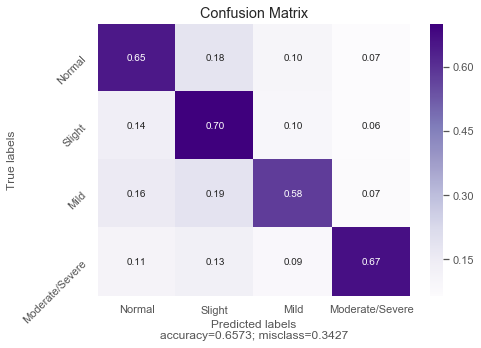

In [129]:
y_probmPower27, y_probmPower210, y_probmPower212, y_probmPower213 = StackedLstm2Fc.predict(mPowerX_test)
mp.calc_confusion_matrix_mPower(y_probmPower27, mPowery_test['27'], False)

                 precision    recall  f1-score   support

         Normal       0.70      0.71      0.71     10197
         Slight       0.71      0.75      0.73     11415
           Mild       0.65      0.57      0.60      3820
Moderate/Severe       0.67      0.48      0.56      1613

      micro avg       0.70      0.70      0.70     27045
      macro avg       0.68      0.63      0.65     27045
   weighted avg       0.69      0.70      0.69     27045



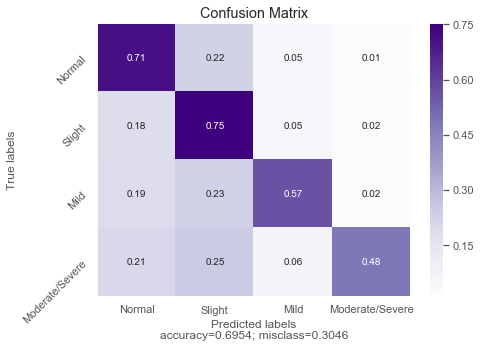

In [130]:
mp.calc_confusion_matrix_mPower(y_probmPower210, mPowery_test['210'], False)

                 precision    recall  f1-score   support

         Normal       0.68      0.70      0.69      8884
         Slight       0.72      0.75      0.73     11709
           Mild       0.74      0.64      0.68      5060
Moderate/Severe       0.64      0.54      0.59      1392

      micro avg       0.70      0.70      0.70     27045
      macro avg       0.69      0.66      0.67     27045
   weighted avg       0.70      0.70      0.70     27045



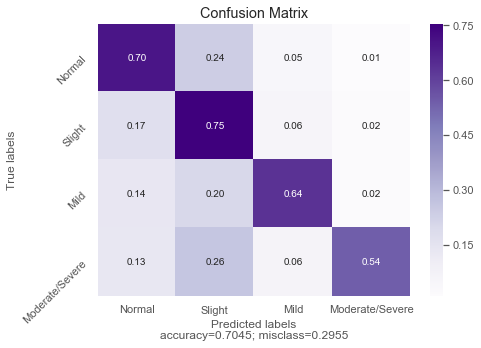

In [131]:
mp.calc_confusion_matrix_mPower(y_probmPower212, mPowery_test['212'], False)

                 precision    recall  f1-score   support

         Normal       0.87      0.93      0.90     20295
         Slight       0.69      0.58      0.63      5128
           Mild       0.66      0.46      0.54       684
Moderate/Severe       0.79      0.60      0.68       938

      micro avg       0.84      0.84      0.84     27045
      macro avg       0.75      0.64      0.69     27045
   weighted avg       0.83      0.84      0.83     27045



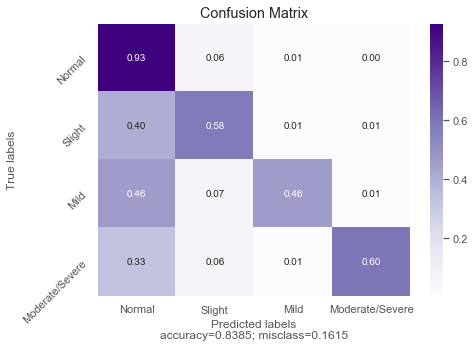

In [132]:
mp.calc_confusion_matrix_mPower(y_probmPower213, mPowery_test['213'], False)

## LSTM 256 segments length

In [4]:
reshaped_TrainSegments256, trainLabels256, train_hcs256 = he.read_mPowerAll(256,256, True, 246)

Reshaping started ...
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8e600904 0
00372eda-3796-481b-96f7-f37e8e600904 00372eda-3796-481b-96f7-f37e8

03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 03f2d1c6-683f-4b8e-8ba9-7cb7ed5e46da 9
temphc
04869afa-ffc0-48af-b84e-af166329b92f 04869afa-ffc0-48af-b84e-af166329b92f 10
04869afa-ffc0-48af-b84e-af166329b92f 04869afa-ffc0-48af-b84e-af166329b92f 10
04869afa-ffc0-48af-b84e-af166329b92f 04869afa-ffc0-48af-b84e-af166329b92f 10
04869afa-ffc0-48af-b84e-af166329b92f 04869afa-ffc0-48af-b84e-af166329b92f 10
0

07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
07c9e291-80fa-49ba-9356-a814d6e05e10 07c9e291-80fa-49ba-9356-a814d6e05e10 16
temphc
080274a4-cddf-47b7-9b8e-679153859229 080274a4-cddf-47b7-9b8e-67915385

090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21
090b6752-abe4-43a7-af04-ae32484971a6 090b6752-abe4-43a7-af04-ae32484971a6 21

0a76e74d-888a-4c9f-bc44-ddb1f73d64fa 0a76e74d-888a-4c9f-bc44-ddb1f73d64fa 23
0a76e74d-888a-4c9f-bc44-ddb1f73d64fa 0a76e74d-888a-4c9f-bc44-ddb1f73d64fa 23
0a76e74d-888a-4c9f-bc44-ddb1f73d64fa 0a76e74d-888a-4c9f-bc44-ddb1f73d64fa 23
0a76e74d-888a-4c9f-bc44-ddb1f73d64fa 0a76e74d-888a-4c9f-bc44-ddb1f73d64fa 23
temphc
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459

0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24
0b1c58e2-49b7-4f0b-a172-fc001459ff6f 0b1c58e2-49b7-4f0b-a172-fc001459ff6f 24

0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25
0b95e050-a6d1-433c-80d6-1573a9457da0 0b95e050-a6d1-433c-80d6-1573a9457da0 25

temphc
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad2307628 27
0cd15828-8c34-40f3-90cd-88aad2307628 0cd15828-8c34-40f3-90cd-88aad230

1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
1120a72b-37ee-4a31-a036-9778165a5bf6 1120a72b-37ee-4a31-a036-9778165a5bf6 40
temphc
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c89f31 41
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c89f31 41
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c89f31 41
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c89f31 41
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c89f31 41
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c89f31 41
112647be-a82d-4a91-aac0-7e0009c89f31 112647be-a82d-4a91-aac0-7e0009c8

116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42
116072b2-8c6f-4d85-9ee2-b94d02b9e754 116072b2-8c6f-4d85-9ee2-b94d02b9e754 42

13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
13627002-073b-4366-8889-9561789c51be 13627002-073b-4366-8889-9561789c51be 48
temphc
13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 49
13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 49
13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 49
13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 49
13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 49
13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 49
13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 49
13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 49
13b0f9d1-8ed3-4e65-bdb3-b2db5d16f92a 13b0f9d1-8ed3-4e65-bdb3-b2db5d16

temphc
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577eb77 56
17556b18-e4f4-4c76-a832-f5d22577eb77 17556b18-e4f4-4c76-a832-f5d22577

1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63
1b660ba9-e247-46d5-a145-35703a04299d 1b660ba9-e247-46d5-a145-35703a04299d 63

temphc
1c9d0333-b4ac-474d-ac87-f7941fb02443 1c9d0333-b4ac-474d-ac87-f7941fb02443 66
1c9d0333-b4ac-474d-ac87-f7941fb02443 1c9d0333-b4ac-474d-ac87-f7941fb02443 66
1c9d0333-b4ac-474d-ac87-f7941fb02443 1c9d0333-b4ac-474d-ac87-f7941fb02443 66
1c9d0333-b4ac-474d-ac87-f7941fb02443 1c9d0333-b4ac-474d-ac87-f7941fb02443 66
temphc
1cc08f7f-2f73-400e-8c3b-48022d2b812b 1cc08f7f-2f73-400e-8c3b-48022d2b812b 67
1cc08f7f-2f73-400e-8c3b-48022d2b812b 1cc08f7f-2f73-400e-8c3b-48022d2b812b 67
1cc08f7f-2f73-400e-8c3b-48022d2b812b 1cc08f7f-2f73-400e-8c3b-48022d2b812b 67
temphc
1d46bacf-a194-4d50-aa15-05dbcb7e754b 1d46bacf-a194-4d50-aa15-05dbcb7e754b 68
1d46bacf-a194-4d50-aa15-05dbcb7e754b 1d46bacf-a194-4d50-aa15-05dbcb7e754b 68
1d46bacf-a194-4d50-aa15-05dbcb7e754b 1d46bacf-a194-4d50-aa15-05dbcb7e754b 68
1d46bacf-a194-4d50-aa15-05dbcb7e754b 1d46bacf-a194-4d50-aa15-05dbcb7e754b 68
1d46bacf-a194-4d50-aa15-05dbcb7e754b 1d46bacf-a194-4d50-aa15-05dbcb7e754b 68
1d46bacf-a194-4d50-aa15-05dbcb7e754b 1d46bacf-a194-4d50

20b7b674-39e1-4a73-b4a8-8d9da92cbb93 20b7b674-39e1-4a73-b4a8-8d9da92cbb93 76
20b7b674-39e1-4a73-b4a8-8d9da92cbb93 20b7b674-39e1-4a73-b4a8-8d9da92cbb93 76
20b7b674-39e1-4a73-b4a8-8d9da92cbb93 20b7b674-39e1-4a73-b4a8-8d9da92cbb93 76
20b7b674-39e1-4a73-b4a8-8d9da92cbb93 20b7b674-39e1-4a73-b4a8-8d9da92cbb93 76
20b7b674-39e1-4a73-b4a8-8d9da92cbb93 20b7b674-39e1-4a73-b4a8-8d9da92cbb93 76
20b7b674-39e1-4a73-b4a8-8d9da92cbb93 20b7b674-39e1-4a73-b4a8-8d9da92cbb93 76
temphc
20c3c767-0c89-4235-99a5-e2816dfc3037 20c3c767-0c89-4235-99a5-e2816dfc3037 77
20c3c767-0c89-4235-99a5-e2816dfc3037 20c3c767-0c89-4235-99a5-e2816dfc3037 77
20c3c767-0c89-4235-99a5-e2816dfc3037 20c3c767-0c89-4235-99a5-e2816dfc3037 77
20c3c767-0c89-4235-99a5-e2816dfc3037 20c3c767-0c89-4235-99a5-e2816dfc3037 77
20c3c767-0c89-4235-99a5-e2816dfc3037 20c3c767-0c89-4235-99a5-e2816dfc3037 77
20c3c767-0c89-4235-99a5-e2816dfc3037 20c3c767-0c89-4235-99a5-e2816dfc3037 77
temphc
20db8ac9-e32d-463c-9485-635dec137afe 20db8ac9-e32d-463c-9485-6

temphc
249e7e51-13a1-40af-8fb4-e8c992028964 249e7e51-13a1-40af-8fb4-e8c992028964 89
249e7e51-13a1-40af-8fb4-e8c992028964 249e7e51-13a1-40af-8fb4-e8c992028964 89
249e7e51-13a1-40af-8fb4-e8c992028964 249e7e51-13a1-40af-8fb4-e8c992028964 89
249e7e51-13a1-40af-8fb4-e8c992028964 249e7e51-13a1-40af-8fb4-e8c992028964 89
temphc
temphc
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138-8340-38bb08c95a43 91
25524235-269f-4138-8340-38bb08c95a43 25524235-269f-4138

26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95
26108325-be0b-4c88-b7c0-ef2e8248ff11 26108325-be0b-4c88-b7c0-ef2e8248ff11 95

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc
temphc

In [9]:
mPowerX_train256, mPowerX_test256, mPowery_train256, mPowery_test256, trainHc256, testHc256 = train_test_split(reshaped_TrainSegments256, trainLabels256, train_hcs256, test_size=0.20, random_state=33)

In [6]:
verbose, epochs, batch_size = 1, 100, 128
n_timesteps, n_features, n_outputs = reshaped_TrainSegments256.shape[1], reshaped_TrainSegments256.shape[2], 4
print("Num_timesteps: " + str(n_timesteps))
print("Num_features: " + str(n_features))
print("Outputs: " + str(n_outputs))

Num_timesteps: 256
Num_features: 6
Outputs: 4


### StackedLstm2 + 1FC

In [7]:
inputL = Input(shape=(n_timesteps, n_features))
firstLstm = CuDNNLSTM(128, return_sequences = True)(inputL)
secondLstm =  CuDNNLSTM(128)(firstLstm)
firstDrop = Dropout(0.4)(secondLstm)

fc1 = Dense(128, activation='relu')(firstDrop)

output27 = Dense(n_outputs, activation='softmax', name='2_7out')(fc1)
output210 = Dense(n_outputs, activation='softmax', name='2_10out')(fc1)
output212 = Dense(n_outputs, activation='softmax', name='2_12out')(fc1)
output213 = Dense(n_outputs, activation='softmax', name='2_13out')(fc1)

StackedLstm2Fc1256 = Model(inputs=inputL, outputs=[output27, output210, output212, output213])
print(StackedLstm2Fc1256.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 6)       0                                            
__________________________________________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)        (None, 256, 128)     69632       input_1[0][0]                    
__________________________________________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)        (None, 128)          132096      cu_dnnlstm_1[0][0]               
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128)          0           cu_dnnlstm_2[0][0]               
__________________________________________________________________________________________________
dense_1 (D

In [10]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
StackedLstm2Fc1256.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# And trained it via:
StackedLstm2Fc1256H = StackedLstm2Fc1256.fit(mPowerX_train256, [to_categorical(mPowery_train256['27']),
                                                              to_categorical(mPowery_train256['210']),
                                                              to_categorical(mPowery_train256['212']),
                                                              to_categorical(mPowery_train256['213'])],
                                      validation_data=(mPowerX_test256, [to_categorical(mPowery_test256['27']),
                                                                              to_categorical(mPowery_test256['210']),
                                                                              to_categorical(mPowery_test256['212']),
                                                                              to_categorical(mPowery_test256['213'])]),
                       epochs=200, batch_size=64)

Train on 53842 samples, validate on 13461 samples
Epoch 1/200
53842/53842 [==============================] - 90s 2ms/step - loss: 4.4992 - 2_7out_loss: 1.3635 - 2_10out_loss: 1.1856 - 2_12out_loss: 1.2000 - 2_13out_loss: 0.7502 - 2_7out_acc: 0.3528 - 2_10out_acc: 0.4155 - 2_12out_acc: 0.4281 - 2_13out_acc: 0.7482 - val_loss: 4.4744 - val_2_7out_loss: 1.3629 - val_2_10out_loss: 1.1767 - val_2_12out_loss: 1.1985 - val_2_13out_loss: 0.7363 - val_2_7out_acc: 0.3515 - val_2_10out_acc: 0.3805 - val_2_12out_acc: 0.4299 - val_2_13out_acc: 0.7535 2_13out_loss: - ETA: 38s - loss: 4.5198 - 2_7out_loss: 1.3659 - 2_10out_loss: 1.1902 - 2_ - ETA: 31s - loss: 4.5104 - - ETA: 21s - loss: 4.5033 - 2_7out_loss: 1.3650 - 2_10out_loss: 1.1856 - 2_12
Epoch 2/200
53842/53842 [==============================] - 83s 2ms/step - loss: 4.4819 - 2_7out_loss: 1.3603 - 2_10out_loss: 1.1819 - 2_12out_loss: 1.1992 - 2_13out_loss: 0.7405 - 2_7out_acc: 0.3545 - 2_10out_acc: 0.4176 - 2_12out_acc: 0.4317 - 2_13out_acc: 0.

53842/53842 [==============================] - 83s 2ms/step - loss: 4.3347 - 2_7out_loss: 1.3430 - 2_10out_loss: 1.1560 - 2_12out_loss: 1.1323 - 2_13out_loss: 0.7034 - 2_7out_acc: 0.3673 - 2_10out_acc: 0.4293 - 2_12out_acc: 0.4653 - 2_13out_acc: 0.7503 - val_loss: 4.2785 - val_2_7out_loss: 1.3318 - val_2_10out_loss: 1.1384 - val_2_12out_loss: 1.1193 - val_2_13out_loss: 0.6890 - val_2_7out_acc: 0.3721 - val_2_10out_acc: 0.4383 - val_2_12out_acc: 0.4789 - val_2_13out_acc: 0.7565: 26s - loss: 4.3536 - 2_7out_loss: 1.3443 - 2_10out_loss: 1.1621  - ETA: 20s - loss: 4.3470 - 2_7out_loss: 1.3441 - 2_10out_loss: 1.1588 - 2_12out_loss: 1.1358 - 2_13out_loss: 0.7083 - 2_7out_acc: 0.3673 - 2_10out_acc: 0.4263 - 2_12out_acc - ETA: 18s - loss: 4.3460 - 2_7out_loss: 1.3441 - 2_10out_loss: 1.1585 - 2_12out_loss: 1.1355 - 2_13out_loss: 0.7079 - 2_7out_acc: 0.3672 - 2_10out_acc: 0.4260 - 2_12out_acc: 0.4625 - 2_13out_acc:  - ETA: 18s - loss: 4.3452 - 2_7out_loss: 1.3442 - 2_10out_loss: 1.1583 - 2_12out

53842/53842 [==============================] - 83s 2ms/step - loss: 3.2025 - 2_7out_loss: 1.0165 - 2_10out_loss: 0.8619 - 2_12out_loss: 0.8320 - 2_13out_loss: 0.4922 - 2_7out_acc: 0.5558 - 2_10out_acc: 0.6160 - 2_12out_acc: 0.6335 - 2_13out_acc: 0.8180 - val_loss: 3.3962 - val_2_7out_loss: 1.0746 - val_2_10out_loss: 0.9042 - val_2_12out_loss: 0.8813 - val_2_13out_loss: 0.5360 - val_2_7out_acc: 0.5252 - val_2_10out_acc: 0.5893 - val_2_12out_acc: 0.6051 - val_2_13out_acc: 0.8037oss: 1.0181 - 2_10out_loss: 0.8632 - 2_12out_loss - ETA: 15s - loss:  - ETA: 5s - loss: 3.2001 - 2_7out_loss: 1.0155 - 2_10out_loss: 0.8609 - 2_12out_loss: 0.8319 - 2_13out_loss: 0.4919 - 2_7out_acc: 0.5566 - 2_10out_acc: 0.6165 - 2_12out - ETA: 2s - loss: 3.2036 - 2_7out_loss: 1.0166 - 2_10out_loss: 0.8618 - 2_12out_loss: 0.8328 - 2_13out_loss: 0.4925 - 2_7out_acc: 0.5560 - 2_10out_acc: 0.6162 - 2_12out_acc: 0
Epoch 31/200
53842/53842 [==============================] - 83s 2ms/step - loss: 3.1677 - 2_7out_loss: 1

53842/53842 [==============================] - 83s 2ms/step - loss: 2.5402 - 2_7out_loss: 0.8140 - 2_10out_loss: 0.6873 - 2_12out_loss: 0.6621 - 2_13out_loss: 0.3768 - 2_7out_acc: 0.6523 - 2_10out_acc: 0.7025 - 2_12out_acc: 0.7126 - 2_13out_acc: 0.8597 - val_loss: 2.9280 - val_2_7out_loss: 0.9136 - val_2_10out_loss: 0.7876 - val_2_12out_loss: 0.7703 - val_2_13out_loss: 0.4565 - val_2_7out_acc: 0.6092 - val_2_10out_acc: 0.6679 - val_2_12out_acc: 0.6644 - val_2_13out_acc: 0.83602_10out - ETA: 25s - loss: 2.5309 - 2_7out_loss: 0.8103 - 2_10out_loss: 0.6855 - 2_12out_loss: 0.6588 - 2_13out_loss: 0.3764 - 2_7out_acc: 0.6524 - 2 - ETA: 23s - loss: 2.5329 - 2_7out_loss: 0.8103 - 2_10out_loss: 0.6 - ETA: 17s - loss: 2.5298 - 2_7out_loss: 0.8092 - 2_10out_loss: 0.6859 - 2_12out_loss: 0.6589 - 2_13out_loss: 0.3759 - 2_7out_acc: 0.6
Epoch 49/200
53842/53842 [==============================] - 83s 2ms/step - loss: 2.5014 - 2_7out_loss: 0.8003 - 2_10out_loss: 0.6794 - 2_12out_loss: 0.6529 - 2_13out_

53842/53842 [==============================] - 83s 2ms/step - loss: 2.0061 - 2_7out_loss: 0.6558 - 2_10out_loss: 0.5449 - 2_12out_loss: 0.5268 - 2_13out_loss: 0.2787 - 2_7out_acc: 0.7197 - 2_10out_acc: 0.7672 - 2_12out_acc: 0.7717 - 2_13out_acc: 0.8972 - val_loss: 3.0048 - val_2_7out_loss: 0.9176 - val_2_10out_loss: 0.8080 - val_2_12out_loss: 0.7936 - val_2_13out_loss: 0.4857 - val_2_7out_acc: 0.6383 - val_2_10out_acc: 0.6831 - val_2_12out_acc: 0.6887 - val_2_13out_acc: 0.8427
Epoch 76/200
53842/53842 [==============================] - 83s 2ms/step - loss: 2.0063 - 2_7out_loss: 0.6554 - 2_10out_loss: 0.5432 - 2_12out_loss: 0.5270 - 2_13out_loss: 0.2807 - 2_7out_acc: 0.7215 - 2_10out_acc: 0.7658 - 2_12out_acc: 0.7706 - 2_13out_acc: 0.8987 - val_loss: 2.9719 - val_2_7out_loss: 0.9117 - val_2_10out_loss: 0.7900 - val_2_12out_loss: 0.7958 - val_2_13out_loss: 0.4745 - val_2_7out_acc: 0.6405 - val_2_10out_acc: 0.6830 - val_2_12out_acc: 0.6865 - val_2_13out_acc: 0.8433t_loss: 0.6360 - 2_10out

53842/53842 [==============================] - 83s 2ms/step - loss: 1.7785 - 2_7out_loss: 0.5915 - 2_10out_loss: 0.4791 - 2_12out_loss: 0.4671 - 2_13out_loss: 0.2407 - 2_7out_acc: 0.7500 - 2_10out_acc: 0.7966 - 2_12out_acc: 0.7977 - 2_13out_acc: 0.9114 - val_loss: 3.0930 - val_2_7out_loss: 0.9208 - val_2_10out_loss: 0.8284 - val_2_12out_loss: 0.8194 - val_2_13out_loss: 0.5244 - val_2_7out_acc: 0.6412 - val_2_10out_acc: 0.6855 - val_2_12out_acc: 0.6800 - val_2_13out_acc: 0.8371loss: 0.2408 - 2_7out_acc: 0.7501 - 2_10out_acc - ETA: 10s - loss: 1.7772 - 2_7out_loss: 0.5900 - 2_10out_loss: 0.4798 - 2_12out_loss: 0.4660 - 2_13out_loss: 0.2414 - 2_7out_acc: 0.7502 - 2_10out_acc: 0.7964 - 2_12out_acc: 0 - ETA: 9s - loss: 1.7755 - 2_7out_loss: 0.5903 - 2_10out_loss: 0.4791 - 2_12out_loss: 0.4654 - 2_1
Epoch 94/200
53842/53842 [==============================] - 83s 2ms/step - loss: 1.8108 - 2_7out_loss: 0.6000 - 2_10out_loss: 0.4919 - 2_12out_loss: 0.4715 - 2_13out_loss: 0.2475 - 2_7out_acc: 0.

53842/53842 [==============================] - 83s 2ms/step - loss: 1.7250 - 2_7out_loss: 0.5776 - 2_10out_loss: 0.4642 - 2_12out_loss: 0.4493 - 2_13out_loss: 0.2340 - 2_7out_acc: 0.7554 - 2_10out_acc: 0.8037 - 2_12out_acc: 0.8062 - 2_13out_acc: 0.9145 - val_loss: 3.2552 - val_2_7out_loss: 0.9663 - val_2_10out_loss: 0.8724 - val_2_12out_loss: 0.8675 - val_2_13out_loss: 0.5490 - val_2_7out_acc: 0.6452 - val_2_10out_acc: 0.6900 - val_2_12out_acc: 0.6937 - val_2_13out_acc: 0.8373 0.8060 - 2_13out_acc:  - ETA: 14s - loss: 1.7254 - 2_7out_loss: 0.5758 - 2_10out_loss: 0.4655 -  - ETA: 7s - loss: 1.7228 - 2_7out_loss: 0.5766 - 2_10out_loss: 0.4640 - 2_12out_loss: 0.4486 - 2_13out_loss: 0.2336 - 2_7out_acc: 0.7561 - 2_10out_acc: 0.8034 - 2_12out_acc: 0.806 - ETA: 5s - loss: 1.7237 - 2_7out_loss: 0.5771 - 2_10out_loss: 0.4635 - 2_12out_loss: 0.4489 - 2_13out_loss: 0.2341 - 2_7out_acc: 0.7558 - 2_10o
Epoch 107/200
53842/53842 [==============================] - 89s 2ms/step - loss: 1.6795 - 2_7ou

53842/53842 [==============================] - 83s 2ms/step - loss: 1.5985 - 2_7out_loss: 0.5407 - 2_10out_loss: 0.4313 - 2_12out_loss: 0.4158 - 2_13out_loss: 0.2108 - 2_7out_acc: 0.7719 - 2_10out_acc: 0.8191 - 2_12out_acc: 0.8240 - 2_13out_acc: 0.9219 - val_loss: 3.3187 - val_2_7out_loss: 0.9779 - val_2_10out_loss: 0.8895 - val_2_12out_loss: 0.8821 - val_2_13out_loss: 0.5692 - val_2_7out_acc: 0.6471 - val_2_10out_acc: 0.6891 - val_2_12out_acc: 0.6874 - val_2_13out_acc: 0.8368s: 0.2117 - 2_7out_acc: 0.7681 - 2_10out_acc: 0.8171 - 2 - ETA: 48s - loss: 1.6180 - 2_7out_loss: 0.5442 - 2_10out_loss: 0.4389 - 2_12out_loss: 0.4227 - 2_13out_loss: 0.2122 - 2_7out_acc: 0.7686 - 2_10out_acc: 0.8168 - 2_12out - ETA: 46s - loss: 1.6185 - 2_7out_loss: 0.5443 - 2_10out_loss: 0.4392 - 2_12out_loss: 0.42 - ETA: 41s - loss: 1.6140 - 2_7out_loss: 0.5448 - ETA: 34s - loss: 1.6079 - 2_7out_loss: 0.5439 - 2_10out_loss: 0.4347 - 2_12out_loss: 0.4178 - 2_13out_loss: 0.2114 - 2_7out_acc:  - ETA: 31s - loss: 1

53842/53842 [==============================] - 83s 2ms/step - loss: 1.5037 - 2_7out_loss: 0.5120 - 2_10out_loss: 0.4020 - 2_12out_loss: 0.3943 - 2_13out_loss: 0.1953 - 2_7out_acc: 0.7854 - 2_10out_acc: 0.8332 - 2_12out_acc: 0.8335 - 2_13out_acc: 0.9287 - val_loss: 3.4456 - val_2_7out_loss: 1.0096 - val_2_10out_loss: 0.9382 - val_2_12out_loss: 0.9059 - val_2_13out_loss: 0.5919 - val_2_7out_acc: 0.6471 - val_2_10out_acc: 0.6872 - val_2_12out_acc: 0.6915 - val_2_13out_acc: 0.8356s: 0.3970 - 2_12out_loss: 0.3934 - 2_13out_loss: 0.1833 - 2_7out_acc: 0.7850 - 2_10out_acc: 0.8337 - 2_12out_a - ETA: 1:05 - loss: 1.5249 - 2_7out_loss: 0.5212 - 2_10out_loss: 0.4070 - 2_12out_loss: 0.4019 - 2_13out_loss: 0.1948 - 2_7out_acc: 0.7817 - 2_10out_acc: 0. - ETA: 1:01 - loss: 1.5301 - 2_7out_loss: 0.5186 - 2_10out_loss: 0.4084 - 2_12out_loss: 0. - ETA: 37s - loss: 1.5018 - 2_7out_loss: 0.5155 - ETA: 12s - loss: 1.5001 - 2_7out_loss: 0.5122 - 2_10out_loss: 0.4014 - 2_12out_loss: 0.3933 - 2_13out_loss: 0.

53842/53842 [==============================] - 83s 2ms/step - loss: 1.4267 - 2_7out_loss: 0.4877 - 2_10out_loss: 0.3831 - 2_12out_loss: 0.3726 - 2_13out_loss: 0.1833 - 2_7out_acc: 0.7971 - 2_10out_acc: 0.8416 - 2_12out_acc: 0.8421 - 2_13out_acc: 0.9328 - val_loss: 3.4173 - val_2_7out_loss: 0.9949 - val_2_10out_loss: 0.9251 - val_2_12out_loss: 0.9060 - val_2_13out_loss: 0.5912 - val_2_7out_acc: 0.6504 - val_2_10out_acc: 0.6898 - val_2_12out_acc: 0.6899 - val_2_13out_acc: 0.8370_12out_loss: 0.3608 - 2_13out_loss: 0.1782 - 2_7out_acc: 0.8001 - 2_10out_acc: 0 - ETA: 1:05 - loss: 1.4542 - 2_7out_loss: 0.4937 - 2_10out_loss: 0.3909 - 2_12out_loss: 0.3764 - 2_13out_loss: 0.1932 - 2_7out_acc: 0.7987 - 2_10out_acc: 0.8346 - 2_12out_acc: 0.8390 - 2_13ou - ETA: 1:04 - loss: 1.4644 - 2_7out_loss: 0.4952 - - ETA: 55s - loss: 1.4545 - 2_7out_loss: 0.4970 - 2_10o - ETA: 39s - loss: 1.4271 - 2_7out_loss: 0.4875 - 2_10out_loss: 0.3829 - 2_12out_loss: 0.3733 - 2_13out_loss: 0.1833 - 2_7out_acc: 0.7991 -

53842/53842 [==============================] - 83s 2ms/step - loss: 1.3364 - 2_7out_loss: 0.4637 - 2_10out_loss: 0.3540 - 2_12out_loss: 0.3503 - 2_13out_loss: 0.1684 - 2_7out_acc: 0.8069 - 2_10out_acc: 0.8549 - 2_12out_acc: 0.8540 - 2_13out_acc: 0.9378 - val_loss: 3.5145 - val_2_7out_loss: 1.0150 - val_2_10out_loss: 0.9526 - val_2_12out_loss: 0.9256 - val_2_13out_loss: 0.6213 - val_2_7out_acc: 0.6412 - val_2_10out_acc: 0.6882 - val_2_12out_acc: 0.6942 - val_2_13out_acc: 0.83437out_loss: 0.4560 - 2_10out_loss: 0.3465 - 2_12out_loss: 0.3437 - 2_13out_loss: 0.1593 - 2_7out_acc: 0.8069 - 2_10out_acc: 0.8508 - 2_ - ETA: 1:06 - loss: 1.2644 - 2_7out_loss: 0.4437 - 2_10out_loss: 0.3319 - 2_12out_loss: 0.3346 - 2_13out_loss: 0.1542 - 2_7out_acc: 0.8139 - 2_10out_acc: 0.860 - ETA: 1:02 - loss: 1.2756 - 2_7out_loss: 0.4416 - 2_10out_loss: 0.3334 - 2_12out_loss: 0.3407 - 2_13out_loss: 0.1599 - 2_7out_acc: 0.8140 - 2_10out_acc: 0.8604 - 2_12out_acc: 0.8602 - 2_ - ETA: 1:00 - loss: 1.2811 - 2_7out_

53842/53842 [==============================] - 83s 2ms/step - loss: 1.3891 - 2_7out_loss: 0.4733 - 2_10out_loss: 0.3696 - 2_12out_loss: 0.3599 - 2_13out_loss: 0.1863 - 2_7out_acc: 0.8051 - 2_10out_acc: 0.8489 - 2_12out_acc: 0.8499 - 2_13out_acc: 0.9329 - val_loss: 3.7008 - val_2_7out_loss: 1.0662 - val_2_10out_loss: 1.0055 - val_2_12out_loss: 0.9807 - val_2_13out_loss: 0.6485 - val_2_7out_acc: 0.6501 - val_2_10out_acc: 0.6883 - val_2_12out_acc: 0.6910 - val_2_13out_acc: 0.833512out_loss: 0.4224 - 2_13out_loss: 0.2378 - 2_7out_acc: 0. - ETA: 30s - loss: 1.4439 - 2_7out_loss: 0.4889 - 2_10out_loss: 0.385 - ETA: 24s - loss: 1.4216 - 2_7out_loss: 0.4829 - 2_10out_loss: 0.3799 - 2_12out_loss: 0.3670 - 2_13out_l - ETA: 20s - loss: 1.4080 - 2_7out_loss: 0.4794 - 2_10out_loss: 0.3754 - 2_12out_loss: 0.3631 - 2_13out_loss: 0.1901 - 2_7out_acc: 0.8028 - 2_10out_acc: 0.8462 - 2_12out_acc: 0.8479 - 2 - ETA: 19s - loss: 1.4073 - 2_7out_loss: 0.4788 - 2_10out_loss: 0.3756 - 2_12out_loss: 0.3630 - 2_

53842/53842 [==============================] - 83s 2ms/step - loss: 1.2609 - 2_7out_loss: 0.4356 - 2_10out_loss: 0.3336 - 2_12out_loss: 0.3282 - 2_13out_loss: 0.1634 - 2_7out_acc: 0.8180 - 2_10out_acc: 0.8652 - 2_12out_acc: 0.8648 - 2_13out_acc: 0.9401 - val_loss: 3.7034 - val_2_7out_loss: 1.0793 - val_2_10out_loss: 1.0153 - val_2_12out_loss: 0.9679 - val_2_13out_loss: 0.6409 - val_2_7out_acc: 0.6454 - val_2_10out_acc: 0.6881 - val_2_12out_acc: 0.6903 - val_2_13out_acc: 0.831140s - loss: 1.2907 - 2_7out_loss: 0.4466 - 2_10out_loss: 0.3428 - 2_12ou - ETA: 6s - loss: 1.2613 - 2_7out_loss: 0.4361 - 2_10out_loss: 0.3348 - 2_12out_loss: 0.3270 - 2_13out_loss: 0.1634 - 2_7out_acc: 0.8
Epoch 196/200
53842/53842 [==============================] - 83s 2ms/step - loss: 1.1837 - 2_7out_loss: 0.4129 - 2_10out_loss: 0.3117 - 2_12out_loss: 0.3116 - 2_13out_loss: 0.1475 - 2_7out_acc: 0.8287 - 2_10out_acc: 0.8726 - 2_12out_acc: 0.8713 - 2_13out_acc: 0.9455 - val_loss: 3.8151 - val_2_7out_loss: 1.0979 

                 precision    recall  f1-score   support

         Normal       0.60      0.60      0.60      3112
         Slight       0.66      0.69      0.68      4731
           Mild       0.59      0.58      0.59      2826
Moderate/Severe       0.73      0.69      0.71      2792

      micro avg       0.65      0.65      0.65     13461
      macro avg       0.65      0.64      0.64     13461
   weighted avg       0.65      0.65      0.65     13461



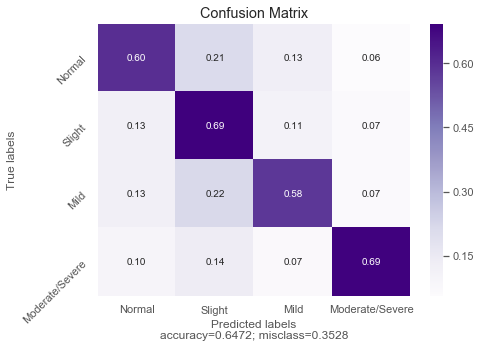

In [11]:
y_probmPower27, y_probmPower210, y_probmPower212, y_probmPower213 = StackedLstm2Fc1256.predict(mPowerX_test256)
mp.calc_confusion_matrix_mPower(y_probmPower27, mPowery_test256['27'], False)

                 precision    recall  f1-score   support

         Normal       0.68      0.73      0.70      5026
         Slight       0.71      0.72      0.72      5742
           Mild       0.70      0.57      0.63      1934
Moderate/Severe       0.56      0.48      0.52       759

      micro avg       0.69      0.69      0.69     13461
      macro avg       0.66      0.63      0.64     13461
   weighted avg       0.69      0.69      0.69     13461



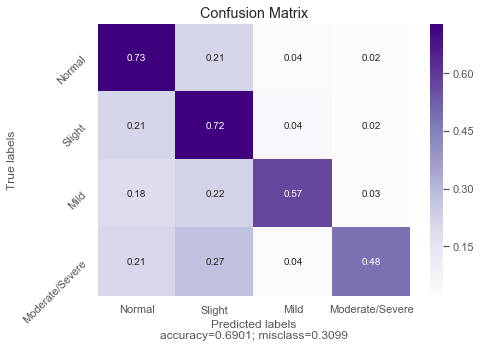

In [13]:
mp.calc_confusion_matrix_mPower(y_probmPower210, mPowery_test256['210'], False)

                 precision    recall  f1-score   support

         Normal       0.68      0.67      0.68      4425
         Slight       0.69      0.74      0.71      5787
           Mild       0.71      0.64      0.67      2570
Moderate/Severe       0.63      0.52      0.57       679

      micro avg       0.69      0.69      0.69     13461
      macro avg       0.68      0.64      0.66     13461
   weighted avg       0.69      0.69      0.69     13461



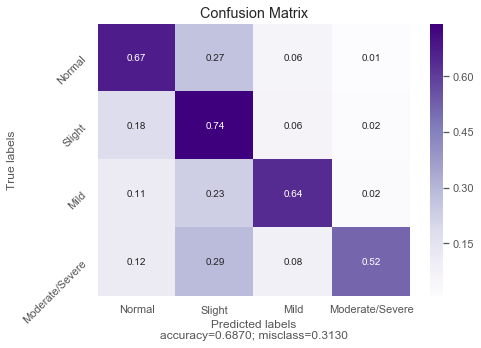

In [14]:
mp.calc_confusion_matrix_mPower(y_probmPower212, mPowery_test256['212'], False)

                 precision    recall  f1-score   support

         Normal       0.87      0.92      0.89     10143
         Slight       0.64      0.55      0.60      2503
           Mild       0.56      0.39      0.46       334
Moderate/Severe       0.80      0.64      0.71       481

      micro avg       0.83      0.83      0.83     13461
      macro avg       0.72      0.63      0.67     13461
   weighted avg       0.82      0.83      0.82     13461



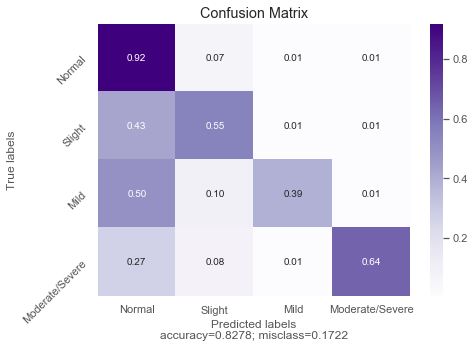

In [15]:
mp.calc_confusion_matrix_mPower(y_probmPower213, mPowery_test256['213'], False)